In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import wilcoxon
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

## Dataset: Spotify and Youtube
### Contenido:

Dataset de canciones de varios artistas en el mundo y para cada canción está presente:


### Contiene como máximo las 10 canciones de aproximadamente 2000 artistas


* **Track:** Nombre de la canción, tal y como aparece en la plataforma Spotify.

* **Artist:** Nombre del artista.
* **Url_spotify**: Url del artista en Spotify

* **Album:** El álbum en el que se encuentra la canción en Spotify.
* **Album_type:** Indica si la canción se publica en Spotify como single o está incluida en un álbum.
* **Uri:** El Url de la canción en spotify.

* **Danceability:** Describe lo adecuada que es una canción para bailar basándose en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 el más bailable.
* **Energy:** Va de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Normalmente, las pistas energéticas son rápidasy ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach puntúa bajo en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la velocidad de inicio y la entropía general.
* **Key:** La clave en la que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de Clase de Tono. Por ejemplo, 0 = Do, 1 = Do♯/Re♭, 2 = Re, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
* **Loudness:** Se refiere al volumen o nivel de intensidad global de una pista musical y se mide en decibelios (dB). 
  Los valores de sonoridad se promedian en toda la pista para obtener una medida representativa del volumen general. Esta medida es útil para comparar el volumen relativo entre diferentes pistas. La sonoridad es la cualidad de un sonido que se asocia psicológicamente con su intensidad física, que se representa mediante la amplitud de la onda sonora. En otras palabras, la sonoridad es la percepción subjetiva de la fuerza o el nivel de volumen de un sonido. Los valores de sonoridad típicamente oscilan entre -60 y 0 dB, donde los valores más cercanos a 0 dB indican un volumen más alto, y los valores más cercanos a -60 dB indican un volumen más bajo.
  
* **Speechiness:** Detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente se asemeje la grabación a palabras habladas (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente están compuestas completamente por palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como palabras habladas, ya sea en secciones o superpuestas, incluyendo casos como la música rap. Los valores inferiores a 0.33 representan probablemente música y otras pistas que no son similares a palabras habladas.


* **Acousticness:** Sirve para medir la probabilidad de que una pista sea acústica. Es una medida de confianza que varía de 0.0 a 1.0. Un valor de 1.0 indica una alta confianza de que la pista es completamente acústica, es decir, que se interpreta utilizando instrumentos musicales acústicos en lugar de instrumentos electrónicos o amplificados.


* **Instrumentalness:** Se utiliza para estimar si una pista es instrumental o contiene voces. Valores cercanos a 1.0 indican una alta probabilidad de que la pista sea completamente instrumental, mientras que valores por encima de 0.5 también sugieren pistas instrumentales, pero con mayor confianza a medida que se acercan a 1.0.


* **Liveness:** Detecta la presencia de una audiencia en la grabación. Valores más altos de liveness representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor por encima de 0.8 indica una fuerte probabilidad de que la pista sea en vivo.



* **Valence:** es una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con un alto valor de valence suenan más positivas (por ejemplo, alegres, felices, eufóricas), mientras que las pistas con un bajo valor de valence suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).


* **Tempo:**  Es el tempo estimado en general de una pista, medido en pulsaciones por minuto (BPM: beats per minute). En terminología musical, el tempo se refiere a la velocidad o ritmo de una pieza musical y se deriva directamente de la duración promedio de los pulsos. Se calcula a partir de la duración promedio de los pulsos o golpes que conforman el ritmo de una pista. Por ejemplo, una pista con un tempo alto tendrá un ritmo rápido, mientras que una pista con un tempo bajo tendrá un ritmo más lento.

* **Duration_ms:** Duración de la pista en milisegundos.


* **Stream:** Número de streams de la canción en Spotify.

* **Url_youtube:** Url de la canción en Youtube.

* **Title:** Título del videoclip en Youtube.
* **Channel:** Nombre del canal que ha publicado el vídeo.
* **Views:** Número de vistas.
* **Likes:** Número de likes.
* **Comments:** Número de comentarios.
* **Description:** Descripción del video de Youtube.
* **Licensed:** Indica si el video representa contenido con licencia, lo que significa que el contenido fue subido a un canal vinculado a un socio de contenido de YouTube y luego reclamado por ese socio.
* **Official_video:** Valor booleano que indica si el video encontrado es el video oficial de la canción.


Notas
Estos datos dependen en gran medida del momento en que se recopilaron, que en este caso es el 7 de febrero de 2023.



## Hipotesis 1: Las canciones más populares son las más bailables, alegres y enérgicas.
## Hipotesis 2: Las canciones más escuchadas no pueden tener una duración muy larga.



PREGUNTAS GENERALES

- ¿Cuál es el artista más popular en Spotify?
- ¿Cuál es el artista más popular en Youtube?
- ¿Cuales son las canciones más populares en ambas plataformas?
- ¿Qué artistas generan mayores interacciones? (likes, comentarios)

In [2]:
# # Importamos el Dataset
Sp_Yt = pd.read_csv('../data/Spotify_Youtube.csv')

## 1. LIMPIEZA DEL DATASET

#### 1.1 Obtenemos los primeros datos:

In [3]:
# Primera visualización del Dataframe
Sp_Yt.head() 

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
# Vemos las dimensiones del Dataframe
Sp_Yt.shape 

(20717, 28)

In [5]:
# Vemos cuantos artistas hay
len(Sp_Yt["Artist"].unique())

2079

In [6]:
# Vemos cuantas canciones hay
len(Sp_Yt["Track"].unique())

17840

In [7]:
# Vemos sus columnas
Sp_Yt.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [8]:
# Vemos que cantidad de valores nulos tiene por columna y el tipo de los valores de cada una
Sp_Yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20717 entries, 0 to 20716
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20717 non-null  int64  
 1   Artist            20717 non-null  object 
 2   Url_spotify       20717 non-null  object 
 3   Track             20717 non-null  object 
 4   Album             20717 non-null  object 
 5   Album_type        20717 non-null  object 
 6   Uri               20717 non-null  object 
 7   Danceability      20715 non-null  float64
 8   Energy            20715 non-null  float64
 9   Key               20715 non-null  float64
 10  Loudness          20715 non-null  float64
 11  Speechiness       20715 non-null  float64
 12  Acousticness      20715 non-null  float64
 13  Instrumentalness  20715 non-null  float64
 14  Liveness          20715 non-null  float64
 15  Valence           20715 non-null  float64
 16  Tempo             20715 non-null  float6

In [9]:
# Comprobamos que no hayan valores duplicados
Sp_Yt.duplicated().sum()

0

In [10]:
# Contamos cuantos valores nulos tiene cada columna
Sp_Yt.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [11]:
# Vemos que columnas contienen 0 para evaluar si son errores
(Sp_Yt == 0).sum() 
# Observamos que hay valores en Danceability, Valence , Speechenees y Tempo que no deberían tener 0. Son filas con errores en los datos. Optamos por descartarlas más adelante

Unnamed: 0             1
Artist                 0
Url_spotify            0
Track                  0
Album                  0
Album_type             0
Uri                    0
Danceability          17
Energy                 0
Key                 2305
Loudness               0
Speechiness           17
Acousticness           0
Instrumentalness    9390
Liveness               0
Valence               26
Tempo                 17
Duration_ms            0
Url_youtube            0
Title                  0
Channel                0
Views                  1
Likes                 17
Comments             498
Description            0
Licensed            6107
official_video      4524
Stream                 0
dtype: int64

In [12]:
Sp_Yt.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20717.0,1.035854e+04,5.981058e+03,0.000000,5.179000e+03,1.035900e+04,1.553800e+04,2.071700e+04
Danceability,20715.0,6.197725e-01,1.652749e-01,0.000000,5.180000e-01,6.370000e-01,7.405000e-01,9.750000e-01
Energy,20715.0,6.352444e-01,2.141503e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20715.0,5.300072e+00,3.576316e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20715.0,-7.671835e+00,4.632807e+00,-46.251000,-8.858000e+00,-6.536000e+00,-4.931500e+00,9.200000e-01
Speechiness,20715.0,9.645839e-02,1.119622e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20715.0,2.915489e-01,2.862991e-01,0.000001,4.520000e-02,1.930000e-01,4.775000e-01,9.960000e-01
Instrumentalness,20715.0,5.596426e-02,1.932663e-01,0.000000,0.000000e+00,2.410000e-06,4.630000e-04,1.000000e+00
Liveness,20715.0,1.935155e-01,1.685331e-01,0.014500,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20715.0,5.298490e-01,2.454459e-01,0.000000,3.390000e-01,5.370000e-01,7.265000e-01,9.930000e-01


In [13]:
Sp_Yt.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,20717.0,NaN,NaN,NaN,10358.537964,5981.057631,0.0,5179.0,10359.0,15538.0,20717.0
Artist,20717,2079,Gorillaz,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Url_spotify,20717,2079,https://open.spotify.com/artist/3AA28KZvwAUcZu...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Track,20717,17840,El Ultimo Adiós - Varios Artistas Version,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album,20717,11936,Greatest Hits,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album_type,20717,3,album,14925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uri,20717,18861,spotify:track:0tzixmHNQfE6S6SirSToxW,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danceability,20715.0,NaN,NaN,NaN,0.619773,0.165275,0.0,0.518,0.637,0.7405,0.975
Energy,20715.0,NaN,NaN,NaN,0.635244,0.21415,0.00002,0.507,0.666,0.798,1.0
Key,20715.0,NaN,NaN,NaN,5.300072,3.576316,0.0,2.0,5.0,8.0,11.0


#### Información del Dataset:

- Tiene 28 columnas
- Tiene 20.718 filas
- Algunas columnas tienen valores nulos
- Tiene 3 tipos de datos. Object , Int y Float

### 1.2 Tratamiento de columnas
 -  Eliminamos las que no nos sirven
 -  Las traducimos al español
 -  Convertimos valores

In [14]:
# Borramos las columnas que no nos darán datos útiles 
Columns_deleter = ['Unnamed: 0','Description','Key','Licensed','official_video','Description','Url_spotify','Url_youtube','Uri','Channel']
Sp_Yt.drop(Columns_deleter, axis=1, inplace=True)

In [15]:
Sp_Yt.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Views',
       'Likes', 'Comments', 'Stream'],
      dtype='object')

In [16]:
# Renombrar las columnas del DataFrame con nombres en español
nombres_espanyol = ['Artista', 'Cancion', 'Album', 'Tipo_album', 'Bailabilidad', 'Energia',
                   'Sonoridad', 'Hablabilidad', 'Acustica', 'Instrumentalidad',
                   'En_vivo', 'Emocion', 'Tempo', 'Duracion_ms', 'Titulo_video',
                   'Visualizaciones_YT', 'Likes_YT', 'Comentarios_YT', 'Reproducciones_SP']
# Utilizamos rename para renombrarlas y Zip para que recorra las columnas de df
Sp_Yt = Sp_Yt.rename(columns=dict(zip(Sp_Yt.columns, nombres_espanyol)))
Sp_Yt.columns

Index(['Artista', 'Cancion', 'Album', 'Tipo_album', 'Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'Instrumentalidad', 'En_vivo',
       'Emocion', 'Tempo', 'Duracion_ms', 'Titulo_video', 'Visualizaciones_YT',
       'Likes_YT', 'Comentarios_YT', 'Reproducciones_SP'],
      dtype='object')

In [17]:
# Convertimos la columna de duración en milisegundos a duración en minutos
Sp_Yt['Duracion_ms'] = (Sp_Yt['Duracion_ms'] / 60000).round(2)
# Renombramos la colummna a Duracion_seg
Sp_Yt.rename(columns={'Duracion_ms':'Duracion_min'},inplace=True)

In [18]:
# Agregamos una columna de Artista - Cancion para que se entienda de que artista es cada cancion
Sp_Yt['Cancion-Artista'] = Sp_Yt.apply(lambda row: ' - '.join([row['Cancion'], row['Artista']]), axis=1)

In [19]:
Sp_Yt.columns

Index(['Artista', 'Cancion', 'Album', 'Tipo_album', 'Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'Instrumentalidad', 'En_vivo',
       'Emocion', 'Tempo', 'Duracion_min', 'Titulo_video',
       'Visualizaciones_YT', 'Likes_YT', 'Comentarios_YT', 'Reproducciones_SP',
       'Cancion-Artista'],
      dtype='object')

### 1.3 Tratamiento de los datos
- Datos nulos
- Datos ceros
- Outliers

In [20]:
Sp_Yt.isna().sum()

Artista                 0
Cancion                 0
Album                   0
Tipo_album              0
Bailabilidad            2
Energia                 2
Sonoridad               2
Hablabilidad            2
Acustica                2
Instrumentalidad        2
En_vivo                 2
Emocion                 2
Tempo                   2
Duracion_min            2
Titulo_video          470
Visualizaciones_YT    470
Likes_YT              541
Comentarios_YT        569
Reproducciones_SP     576
Cancion-Artista         0
dtype: int64

Podemos observar que hay datos nulos en cuanto a visualizaciones, Likes y Comentarios y Reproducciones. <br>
Al faltar datos, buscaremos la media de cada dato por artista para completar los nulos con valores representativos

In [21]:
# Calculamos el promedio de likes,comentarios, visualizaciones y reproducciones por artista
# Utilizamos el método 'groupby' y luego calculamos las medias 
artista_media_likes = Sp_Yt.groupby('Artista')['Likes_YT'].mean()
artista_media_comentarios = Sp_Yt.groupby('Artista')['Comentarios_YT'].mean()
artista_media_visualizaciones = Sp_Yt.groupby('Artista')['Visualizaciones_YT'].mean()
artista_media_reproducciones = Sp_Yt.groupby('Artista')['Reproducciones_SP'].mean()

In [22]:
# Rellenamos los valores nulos con el promedio de cada valor por artista
#  Utilizamos el metodo 'map' para mapear los valores pormedio correspondientes a cada artista

Sp_Yt['Likes_YT'] = Sp_Yt['Likes_YT'].fillna(Sp_Yt['Artista'].map(artista_media_likes))
Sp_Yt['Comentarios_YT'] = Sp_Yt['Comentarios_YT'].fillna(Sp_Yt['Artista'].map(artista_media_comentarios))
Sp_Yt['Visualizaciones_YT'] = Sp_Yt['Visualizaciones_YT'].fillna(Sp_Yt['Artista'].map(artista_media_visualizaciones))
Sp_Yt['Reproducciones_SP'] = Sp_Yt['Reproducciones_SP'].fillna(Sp_Yt['Artista'].map(artista_media_reproducciones))

In [23]:
# Aún quedan valores nulos en estas dos variables.
# Esto se debe a un error en el df. 
# Al ser pocos, decidmos completar con 0 los valores nulos para poder realizar futuros analisis.
Sp_Yt["Likes_YT"].fillna(0,inplace=True)
Sp_Yt["Comentarios_YT"].fillna(0,inplace=True)

También faltan datos en cuanto al título del video en youtube. <br>
En este caso, optamos por renombrar el video con el nombre de la canción y el artista

In [24]:
# Utilizamos 'fillna' para completar los valores nulos en Titulo_video por Cancion - Artista
Sp_Yt['Titulo_video'] = Sp_Yt['Titulo_video'].fillna(Sp_Yt['Cancion'] + ' - ' + Sp_Yt['Artista'])

#### Duracion_min

In [25]:
# Vemos si los 2 valores nulos en cada variable corresponden a las mismas canciones
Sp_Yt[Sp_Yt["Duracion_min"].isna()]
# Eliminamos las 2 filas por falta de datos.
Sp_Yt = Sp_Yt.dropna(subset='Duracion_min')


In [26]:
Sp_Yt['Duracion_min'].describe()

count    20715.000000
mean         3.745335
std          2.079912
min          0.520000
25%          3.000000
50%          3.550000
75%          4.210000
max         77.930000
Name: Duracion_min, dtype: float64

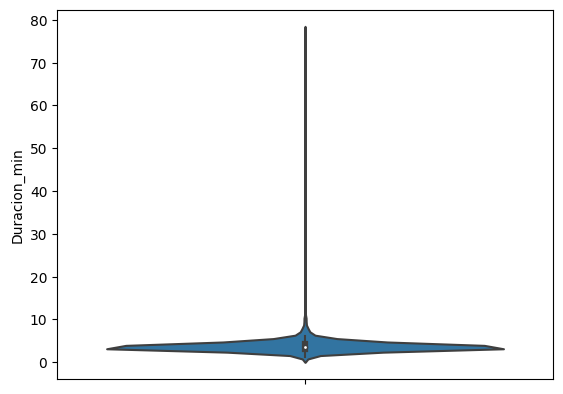

In [27]:
# Para ver como se representan los outliers crear el diagrama de violín
sns.violinplot(y=Sp_Yt['Duracion_min'])
plt.show()
# Podemos ver que son muy pocos los valores altos, tampcoo tienen sentido canciones de más de 12 minutos.

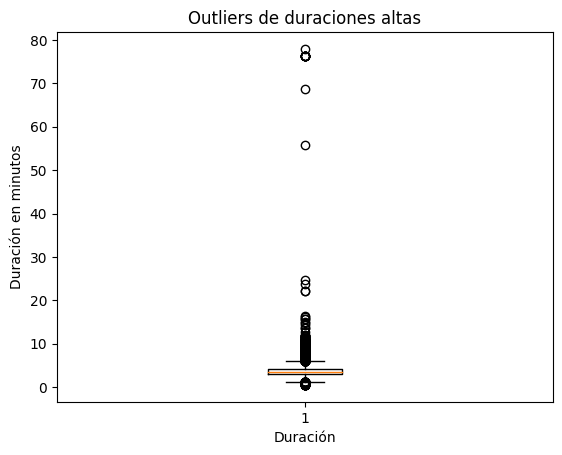

In [28]:
# Crear un gráfico de caja para ver como outliers las canciones más altas
plt.boxplot(Sp_Yt["Duracion_min"])

# Etiquetas y título del gráfico
plt.xlabel("Duración")
plt.ylabel("Duración en minutos")
plt.title("Outliers de duraciones altas")
plt.show()


In [29]:
canciones_largas = Sp_Yt[Sp_Yt["Duracion_min"] > 10]
# Vemos que la mayoria de las canciones que sobrepasan los 10 minutos son 'Non Stop Remixes'

In [30]:
canciones_cortas = Sp_Yt[Sp_Yt["Duracion_min"]< 1.0]
# Vemos que las canciones con menos de 1 min de duración son adelantos de canciones

In [31]:
print(canciones_largas.shape) # Hay en total 76 canciones
print(canciones_largas['Cancion'].nunique()) # de las cuales 40 no están hechas por varios artistas

(76, 20)
40


In [32]:
# Eliminamos los outliers de canciones que superen los 10 min
Sp_Yt = Sp_Yt.drop(Sp_Yt[Sp_Yt['Duracion_min'] > 10].index)
Sp_Yt = Sp_Yt.drop(Sp_Yt[Sp_Yt['Duracion_min'] < 1.0].index)

In [33]:
Sp_Yt.isnull().sum()

Artista                 0
Cancion                 0
Album                   0
Tipo_album              0
Bailabilidad            0
Energia                 0
Sonoridad               0
Hablabilidad            0
Acustica                0
Instrumentalidad        0
En_vivo                 0
Emocion                 0
Tempo                   0
Duracion_min            0
Titulo_video            0
Visualizaciones_YT    159
Likes_YT                0
Comentarios_YT          0
Reproducciones_SP     166
Cancion-Artista         0
dtype: int64

Para completar los otros datos nulos vamos a hacer lo siguiente: <br>
Calcular que relacion hay entre las medias generales de Vizualizaciones_YT con respecto a las medias de Reproducciones_SP.<br>
Con esto, crearemos un indice por el cual podremos multiplicar las Visualizaciones_YT de cada canción por el indice para estimar las Reproduciones_SP <br>
un número de Visualizaciones_YT más representativo<br>
Luego haremos lo mismo invertido


Vamos a calcular, cuanto porcentaje se escucha más en spotify que en youtube comparando los promedios de las visualizaciones con el promedio de las reproducciones totales


In [34]:
media_vis = Sp_Yt['Visualizaciones_YT'].mean() # Calculamos la media de Visualizaciones
media_rep = Sp_Yt['Reproducciones_SP'].mean() # Calculamos la media de Reproducciones
print(media_rep)
print(media_vis)

135960146.2566267
94051337.11755143


In [35]:
relacion_vis = media_vis / media_rep # Buscamos la realción que hay entre las medias visualizaciones con la de reproduccion de spotify
print(relacion_vis)
relacion_rep = media_rep/media_vis # Relacion entre las medias de visualizaciones con la de reproducciones
print(relacion_rep)

0.6917566633094687
1.445595038023701


In [36]:
# Multuplicamos las reproducciones por la relación para tener un valor aproximado de las visualizaciones en Youtube
Sp_Yt['Visualizaciones_YT'] = Sp_Yt['Visualizaciones_YT'].fillna(Sp_Yt['Reproducciones_SP'] * relacion_vis) 

In [37]:
# Multuplicamos las visualizaciones  por la relación para tener un valor aproximado de las reproducciones en spotify
Sp_Yt['Reproducciones_SP'] = Sp_Yt['Reproducciones_SP'].fillna(Sp_Yt['Visualizaciones_YT'] * relacion_rep)

In [38]:
# Una vez completado los valores vacíos de reproducciones y visualizaciones creamos la columna Escuchas_Totales
Sp_Yt["Escuchas_Totales"] = Sp_Yt["Visualizaciones_YT"] + Sp_Yt["Reproducciones_SP"]

### 1.4 LIMPIEZA DE LOS DATOS POR VARIABLES

In [39]:
Sp_Yt.shape

(20593, 21)

1.4.1 - **Hablabilidad:** Detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente se asemeje la grabación a palabras habladas (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cercano a 1.0 será el valor del atributo. 

Analizando: 
- Speechiness > 0.66 Audiolibros o relatos. 

- Los valores entre 0.10 y 0.66 son canciones donde predomina la voz, por lo general géneros como rap y trap. 

- Los valores inferiores a 0.10 representan canciones más melódicas

In [40]:
# Creamos el DF Speech para analizar la hablabilidad
speech = Sp_Yt.groupby(['Titulo_video','Artista'])[['Hablabilidad']].max().sort_values(['Hablabilidad'], ascending=False)
speech

,,Hablabilidad
Titulo_video,Artista,
Sherlock Holmes e l'ultimo saluto - Arthur Conan Doyle,Sir Arthur Conan Doyle,0.964
Sherlock Holmes e il mistero di Boscombe Valley - Arthur Conan Doyle,Sir Arthur Conan Doyle,0.962
Bibi Blocksberg - Der Hexenbesenausflug (Folge 146) | EXTRALANGE Hörprobe,Bibi Blocksberg,0.961
Kapitel 11: Der Hexenbesenausflug (Folge 146) - Bibi Blocksberg,Bibi Blocksberg,0.961
Die sieben Todsünden (Der Sherlock Holmes Adventkalender 2022 – Teil 14) Krimi Hörbuch,Sherlock Holmes,0.960
...,...,...
Richter: The Departure,Lang Lang,0.000
Baby Sleep Brown Noise,White Noise Baby Sleep,0.000
M83 - Adieux (audio),M83,0.000


In [41]:
# Analizamos los bajos valores de Speechiness
speech[(speech['Hablabilidad'] < 0.02)].sort_values(['Hablabilidad'], ascending=True)

,,Hablabilidad
Titulo_video,Artista,
"White Noise Relaxation for Calming Down Fussy Infant Baby, Sleepy Toddler or Child",White Noise Baby Sleep,0.0
Arrival,The Alchemist,0.0
"Brown Noise, Black Screen 🟤⬛ • 12 hours • No ads",White Noise for Babies,0.0
"White Noise Black Screen | Sleep, Study, Focus | 10 Hours",White Noise for Babies,0.0
Louis Armstrong - Hello Dolly,Louis Armstrong,0.0
Air Conditioner - Loopable With No Fade,White Noise Baby Sleep,0.0
beach waves and soothing brown noise,Ocean Waves For Sleep,0.0
Air Conditioner - Loopable With No Fade,White Noise for Babies,0.0
Clean White Noise - Loopable With No Fade,White Noise Baby Sleep,0.0


In [42]:
# Analizamos los altos valores de Speechiness
speech[(speech['Hablabilidad'] > 0.68)].sort_values(['Hablabilidad'], ascending=True)

,,Hablabilidad
Titulo_video,Artista,
The Backyardigans - Castaways (Lyrics) | castaways we are castaways ahoy there ahoy we are castaways,D.O.E.,0.701
Kapitel 6.2 & Kapitel 7.1 - Die kleine Hexe - Das Hörspiel - Santiago Ziesmer,Santiago Ziesmer,0.707
Drachenzähmen leicht gemacht 3 - Teil 4,Thomas Karallus,0.709
Let Go (Acapella),Dina Rae,0.714
A Boogie Wit Da Hoodie - Jungle (Prod. by D Stackz / Dir. by Gerard Victor) [Official Music Video],A Boogie Wit da Hoodie,0.737
...,...,...
Die sieben Todsünden (Der Sherlock Holmes Adventkalender 2022 – Teil 14) Krimi Hörbuch,Sherlock Holmes,0.960
Kapitel 11: Der Hexenbesenausflug (Folge 146) - Bibi Blocksberg,Bibi Blocksberg,0.961
Bibi Blocksberg - Der Hexenbesenausflug (Folge 146) | EXTRALANGE Hörprobe,Bibi Blocksberg,0.961


Vemos que los valores con hablabilidad muy altos son audio libros y los valores con hablabilidad muy bajos son White Noise.<br>
Los valores que tienen Hablabilidad < 0.2 son audiolibros o whithe noice (Ruido instrumental para relajación) <br>
Los valores que tienen Hablabilidad > 0.68 son audiolibros<br>

In [43]:
# Armamos un df con los valores de Hablabilidad que no nos sirven
hablabilidad_mal = Sp_Yt[(Sp_Yt['Hablabilidad'] < 0.02) | (Sp_Yt['Hablabilidad'] > 0.68)].sort_values('Hablabilidad')
# Con drop eliminamos los valores del Dataframe
Sp_Yt= Sp_Yt.drop(Sp_Yt[(Sp_Yt['Hablabilidad'] < 0.02) | (Sp_Yt['Hablabilidad'] > 0.68)].index)

1.4.2 **Artista, Cancion y Album**

In [44]:
# Buscamos los artistas y canciones que incluyan white Noise o Meditation
White_Noise = Sp_Yt[(Sp_Yt["Cancion"].str.contains("White Noise")) | (Sp_Yt["Artista"].str.contains("White Noise"))]
# Con drop eliminamos los valores del Dataframe
Sp_Yt= Sp_Yt.drop(White_Noise.index)
# Artistas que se llamen Sound son sonidos
Sound = Sp_Yt[Sp_Yt["Artista"].str.contains("Sound")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt= Sp_Yt.drop(Sound.index)
# Artistas que se llamen Sleep son sonidos para dormir
Sleep = Sp_Yt[Sp_Yt["Artista"].str.contains("Sleep")]
Sleep
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Sleep.index)
# Albumes con nombre que incluyan "Motion Picture" para descartar Bandas Sonoras de peliculas
Motion_picture= Sp_Yt[Sp_Yt['Album'].str.contains("Motion Picture")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Motion_picture.index)
# Albumes que contengan el nombre "Soundtrack" hacen referencia a la Banda Sonora de una pelicula 
Soundtrack = Sp_Yt[Sp_Yt['Album'].str.contains("Soundtrack")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Soundtrack.index)
# Albumes que contengan el nombre "Movie" hacen referencia a la Banda Sonora de una pelicula
Movie = Sp_Yt[Sp_Yt['Album'].str.contains("Movie")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Movie.index)
# Buscamos el df con sonidos de peliculas de HBO
hbo = Sp_Yt[Sp_Yt['Album'].str.contains("HBO")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(hbo.index)
# Albumes con banda sonora del juego Minecraft
Minecraft = Sp_Yt[Sp_Yt['Album'].str.contains("Minecraft")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Minecraft.index)
# Albumes que contengan la palabra Meditation
Meditation = Sp_Yt[Sp_Yt['Album'].str.contains("Meditation")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Meditation.index)
# Albumes que contengan la palabra DNA repair
dna_repair = Sp_Yt[Sp_Yt['Album'].str.contains("DNA Repair")]
# Albumes que contengan la palabra Last - Sale soundtruck del juego TLOU
Sp_Yt = Sp_Yt.drop(dna_repair.index)
Last = Sp_Yt[Sp_Yt['Album'].str.contains("The Last of Us")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Last.index)
# Albumes que contengan la palabra "Folge" (Episodio en Aleman)
Folge = Sp_Yt[Sp_Yt['Album'].str.contains("Folge")]
# Con drop eliminamos los valores del Dataframe
Sp_Yt = Sp_Yt.drop(Folge.index)



In [45]:
Sp_Yt.shape

(19537, 21)

1.4.3 **Instrumentalidad:** Se utiliza para estimar si una pista es instrumental o contiene voces. Valores cercanos a 1.0 indican una alta probabilidad de que la pista sea completamente instrumental, mientras que valores por encima de 0.5 también sugieren pistas instrumentales, pero con mayor confianza a medida que se acercan a 1.0.

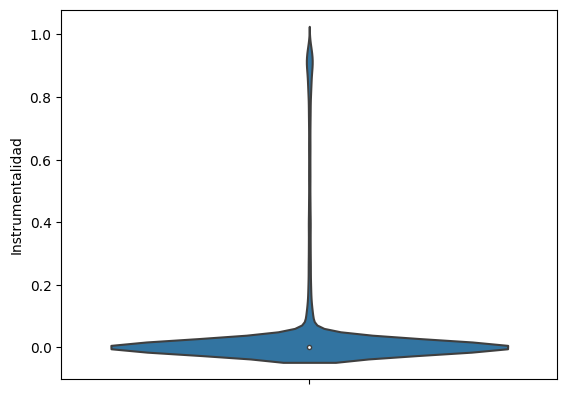

In [46]:
# Para ver como están distribuidas las canciones segun su Instrumentalidad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Instrumentalidad'])
plt.show()
# Podemos ver que son muy pocos los valores altos.

In [47]:
# Hacemos un describe para saber donde se enuentran los valores
Sp_Yt['Instrumentalidad'].describe()
# Vemos que los valores se acumulan en su mayoria por debajo del 0.0005
# Esto nos indica que los valores probablemente estén mal

count    19537.000000
mean         0.046355
std          0.172772
min          0.000000
25%          0.000000
50%          0.000002
75%          0.000364
max          0.978000
Name: Instrumentalidad, dtype: float64

In [48]:
Sp_Yt[Sp_Yt['Instrumentalidad'] == 0.00].head() # Vemos las canciones que supuestamente tienen 0 de instrumentalidad

,Artista,Cancion,Album,Tipo_album,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,Instrumentalidad,...,Emocion,Tempo,Duracion_min,Titulo_video,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista,Escuchas_Totales
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.0253,0.0,...,0.525,167.953,5.68,Gorillaz - Clint Eastwood (Official Video),6.184810e+08,6197318.0,155930.0,6.172597e+08,Clint Eastwood - Gorillaz,1.235741e+09
12,Red Hot Chili Peppers,Can't Stop,By the Way (Deluxe Edition),album,0.618,0.938,-3.442,0.0456,0.0179,0.0,...,0.875,91.455,4.48,Red Hot Chili Peppers - Can't Stop [Official M...,3.366358e+08,1740224.0,32573.0,8.664650e+08,Can't Stop - Red Hot Chili Peppers,1.203101e+09
20,50 Cent,In Da Club,Get Rich Or Die Tryin',album,0.902,0.720,-2.776,0.3470,0.2600,0.0,...,0.805,90.059,3.22,50 Cent - In Da Club (Official Music Video),1.682616e+09,10481678.0,296745.0,1.041737e+09,In Da Club - 50 Cent,2.724353e+09
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,-4.221,0.2610,0.0714,0.0,...,0.659,94.028,3.53,"Eminem, 50 Cent - Is This Love ('09) [Visualizer]",5.289821e+06,245935.0,9008.0,2.852984e+07,Is This Love ('09) (feat. 50 Cent) - 50 Cent,3.381966e+07
28,50 Cent,If I Can't,Get Rich Or Die Tryin',album,0.892,0.631,-2.522,0.3020,0.2440,0.0,...,0.838,93.975,3.28,50 Cent - If I Can't (Official Music Video),4.609600e+04,612.0,14.0,2.104736e+08,If I Can't - 50 Cent,2.105197e+08


In [49]:
# Decidimos borrar la columna ya que no tiene datos relevantes ni de buena calidad para el estudio
Sp_Yt.drop("Instrumentalidad",axis=1, inplace=True)

In [50]:
Sp_Yt.describe()

,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Escuchas_Totales
count,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,1.953700e+04,1.953700e+04,1.953700e+04,1.953700e+04,1.953700e+04
mean,0.625876,0.643056,-7.390913,0.092677,0.279614,0.192831,0.536373,121.120305,3.678331,9.603533e+07,6.693507e+05,2.795956e+04,1.393704e+08,2.354058e+08
std,0.159744,0.207288,4.250326,0.094215,0.279540,0.167753,0.242204,29.265404,1.052871,2.779517e+08,1.805671e+06,1.961158e+05,2.456343e+08,4.691430e+08
min,0.064000,0.001440,-44.761000,0.022000,0.000001,0.014500,0.030100,37.114000,1.010000,8.000000e+00,0.000000e+00,0.000000e+00,1.156476e+01,1.956476e+01
25%,0.524000,0.519000,-8.588000,0.035600,0.041900,0.093900,0.345000,97.311000,3.010000,2.039376e+06,2.222100e+04,5.340000e+02,1.877039e+07,2.803106e+07
50%,0.641000,0.672000,-6.425000,0.050700,0.181000,0.125000,0.543000,119.996000,3.550000,1.555879e+07,1.271600e+05,3.336000e+03,5.307617e+07,8.255248e+07
75%,0.744000,0.801000,-4.871000,0.104000,0.455000,0.236000,0.731000,139.979000,4.170000,7.226534e+07,5.281470e+05,1.455000e+04,1.436867e+08,2.321083e+08
max,0.975000,0.998000,0.920000,0.675000,0.996000,1.000000,0.991000,243.372000,10.000000,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,9.586248e+09


In [51]:
# Vemos que variables contienen 0 para evaluar si son errores
(Sp_Yt == 0).sum() 

Artista                 0
Cancion                 0
Album                   0
Tipo_album              0
Bailabilidad            0
Energia                 0
Sonoridad               0
Hablabilidad            0
Acustica                0
En_vivo                 0
Emocion                 0
Tempo                   0
Duracion_min            0
Titulo_video            0
Visualizaciones_YT      0
Likes_YT              162
Comentarios_YT        529
Reproducciones_SP       0
Cancion-Artista         0
Escuchas_Totales        0
dtype: int64

# 2. ANALISIS DE DATOS

### 2.1 UNIDIMENSIONAL

**Bailabilidad:** Describe lo adecuada que es una canción para bailar basándose en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 el más bailable.

In [52]:
# Vemos los estadisticos de la variable
Sp_Yt['Bailabilidad'].describe()

count    19537.000000
mean         0.625876
std          0.159744
min          0.064000
25%          0.524000
50%          0.641000
75%          0.744000
max          0.975000
Name: Bailabilidad, dtype: float64

In [53]:
# Vemos las canciones con más Bailabilidad
Bailabilidad = (Sp_Yt.groupby(['Cancion','Artista'])[['Bailabilidad']].max()).sort_values(by='Bailabilidad', ascending=False).head(12)
Bailabilidad

Bailabilidad
Cancion                                         Artista                         
Give It To Me                                   Timbaland                  0.975
CAN'T TOUCH THIS                                BIA                        0.975
Funky Friday                                    Dave                       0.975
Psycho Pass                                     Xavier Wulf                0.973
RIP Young (feat. Project Pat & Juicy J) - Remix Project Pat                0.971
                                                Juicy J                    0.971
Trick Me - Club Mix                             Kelis                      0.970
Baby (Lil Baby feat. DaBaby)                    DaBaby                     0.970
                                                Lil Baby                   0.970
Like I Ain't                                    Tech N9ne                  0.970
Let Go                                          Dina Rae                   0.969
If You're Happy                                 Super Simple Songs         0.968

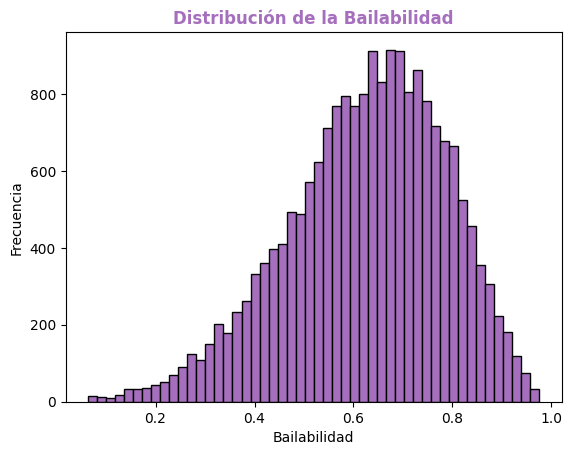

In [54]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Bailabilidad"], bins=50, color="#A56FBD",edgecolor='black')
plt.xlabel('Bailabilidad')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la Bailabilidad',fontweight='bold',color="#A56FBD");

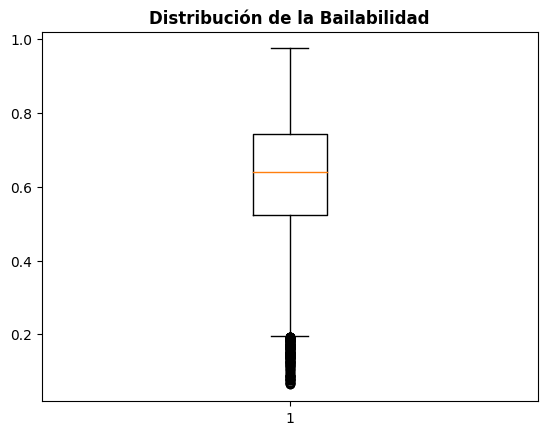

In [55]:
plt.boxplot(Sp_Yt.Bailabilidad,)
plt.title('Distribución de la Bailabilidad',fontweight='bold',color="black");

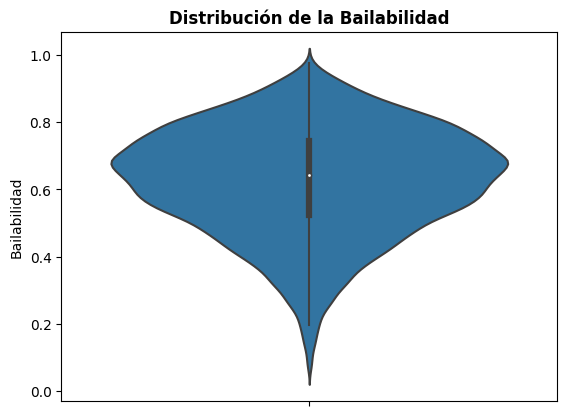

In [56]:
# Para ver como están distribuidas las canciones segun su Bailabilida realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Bailabilidad'])
plt.title('Distribución de la Bailabilidad',fontweight='bold',color="black")
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 2.3761141690490633e-139 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 67.27939843256536 > 0.787 para alpha de 5.0% 


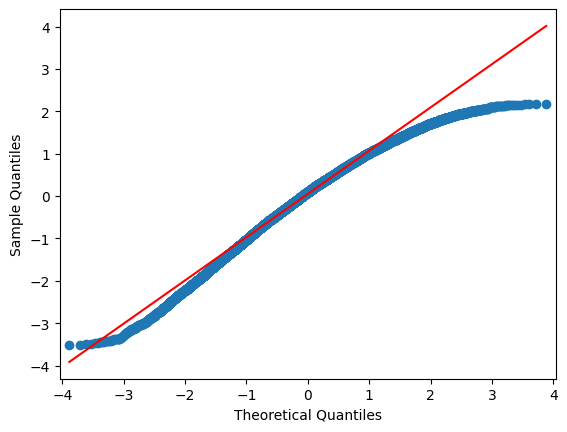

In [57]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Bailabilidad"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Bailabilidad)[0],anderson(Sp_Yt.Bailabilidad)[1][2],anderson(Sp_Yt.Bailabilidad)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Bailabilidad"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

In [58]:
anderson(Sp_Yt.Bailabilidad)

AndersonResult(statistic=67.27939843256536, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6258758714234529, scale=0.15974377367259102)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [59]:
# Creamos un dataset con las 10 canciones más bailables ordenadas por Visualizaciones
top_bailabilidad = Sp_Yt.groupby(['Titulo_video','Bailabilidad']).max().reset_index() 
top_bailabilidad = top_bailabilidad[top_bailabilidad['Bailabilidad'] > 0.95].sort_values('Visualizaciones_YT',ascending=False).head(10) # Ordenamos las más bailadas por las más vistas
top_bailabilidad

,Titulo_video,Bailabilidad,Artista,Cancion,Album,Tipo_album,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista,Escuchas_Totales
5498,Five Little Ducks | Kids Songs | Super Simple ...,0.956,Super Simple Songs,Five Little Ducks,Baby Shark & More Kids Songs,album,0.340,-10.195,0.0487,0.0614,0.0596,0.593,116.006,2.54,1.447813e+09,3463666.0,0.0,36270807.0,Five Little Ducks - Super Simple Songs,1.484084e+09
6907,If You're Happy | Super Simple Songs,0.968,Super Simple Songs,If You're Happy,The Bath Song & More Kids Songs,album,0.257,-10.953,0.0981,0.3250,0.0930,0.954,114.892,1.85,8.892614e+08,1392353.0,0.0,29904583.0,If You're Happy - Super Simple Songs,9.191660e+08
2030,"Black Eyed Peas, Shakira - GIRL LIKE ME (Offic...",0.965,Black Eyed Peas,GIRL LIKE ME,TRANSLATION,album,0.485,-8.784,0.1910,0.0206,0.0655,0.312,124.025,3.71,6.625291e+08,5488829.0,222922.0,453923193.0,GIRL LIKE ME - Black Eyed Peas,1.116452e+09
14323,Sean Paul - Temperature (Official Video),0.951,Sean Paul,Temperature,The Trinity,album,0.600,-4.675,0.0685,0.1060,0.0712,0.822,125.040,3.64,3.613149e+08,2124819.0,38673.0,590578908.0,Temperature - Sean Paul,9.518938e+08
8077,Justin Timberlake - SexyBack (Official Video) ...,0.967,Justin Timberlake,SexyBack (feat. Timbaland),FutureSex/LoveSounds,album,0.583,-5.562,0.0789,0.0584,0.0519,0.964,117.000,4.05,2.661145e+08,1715168.0,41799.0,656261161.0,SexyBack (feat. Timbaland) - Justin Timberlake,9.223756e+08
14445,Shaggy - Hey Sexy Lady ft. Brian & Tony Gold (...,0.957,Shaggy,Hey Sexy Lady,Lucky Day,album,0.554,-6.618,0.0670,0.0052,0.2490,0.640,101.783,3.33,2.016404e+08,1140621.0,14766.0,63853876.0,Hey Sexy Lady - Shaggy,2.654943e+08
11725,Nelly - Hot In Herre (Official Music Video),0.956,Nelly,Hot In Herre,Nellyville,album,0.745,-4.753,0.1200,0.2060,0.0615,0.912,107.075,3.80,1.793610e+08,1020227.0,27963.0,389070840.0,Hot In Herre - Nelly,5.684319e+08
13089,"Quality Control, Lil Baby, & DaBaby - ""Baby"" (...",0.970,Lil Baby,Baby (Lil Baby feat. DaBaby),Quality Control: Control The Streets Volume 2,album,0.463,-7.259,0.3660,0.0957,0.1510,0.460,108.003,2.37,1.348591e+08,1184063.0,29249.0,389570923.0,Baby (Lil Baby feat. DaBaby) - Lil Baby,5.244301e+08
8733,L7NNON & BIEL DO FURDUNCINHO - Ai Preto 🤤 (par...,0.953,L7NNON,Ai Preto,Ai Preto,single,0.570,-5.149,0.2450,0.5370,0.0993,0.834,129.947,2.19,1.332315e+08,1073290.0,8770.0,140786187.0,Ai Preto - L7NNON,2.740177e+08
16289,Timbaland - Give It To Me (Official Music Vide...,0.975,Timbaland,Give It To Me,Shock Value,album,0.711,-3.904,0.0632,0.1680,0.0799,0.815,110.621,3.90,1.331471e+08,760396.0,17486.0,165286007.0,Give It To Me - Timbaland,2.984331e+08


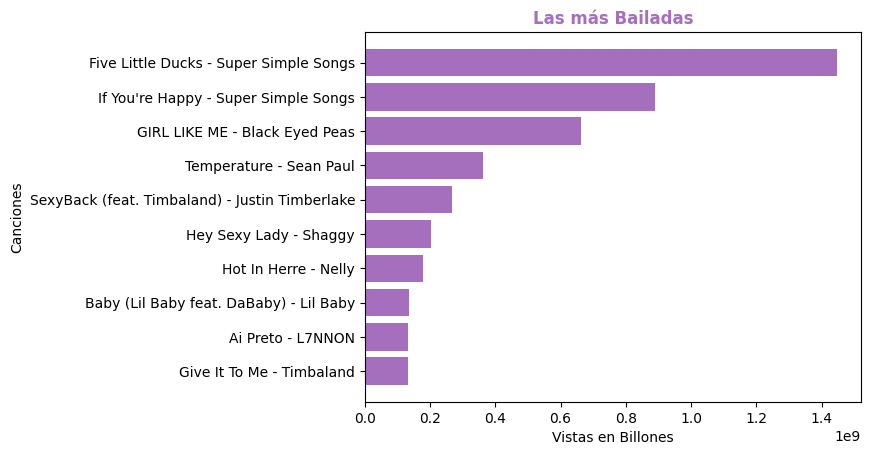

In [60]:
fig, ax = plt.subplots()
# asignamos las variables
Dance_song = top_bailabilidad['Cancion-Artista']
dance_views = top_bailabilidad['Visualizaciones_YT']
# Ordenar los datos en orden descendente
Dance_song =Dance_song[::-1]
dance_views = dance_views[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Vistas en Billones')
ax.set_ylabel('Canciones')
ax.set_title('Las más Bailadas',color="#A56FBD",fontweight='bold')
# Graficar los datos
ax.barh(Dance_song, dance_views,color="#A56FBD")
plt.show()

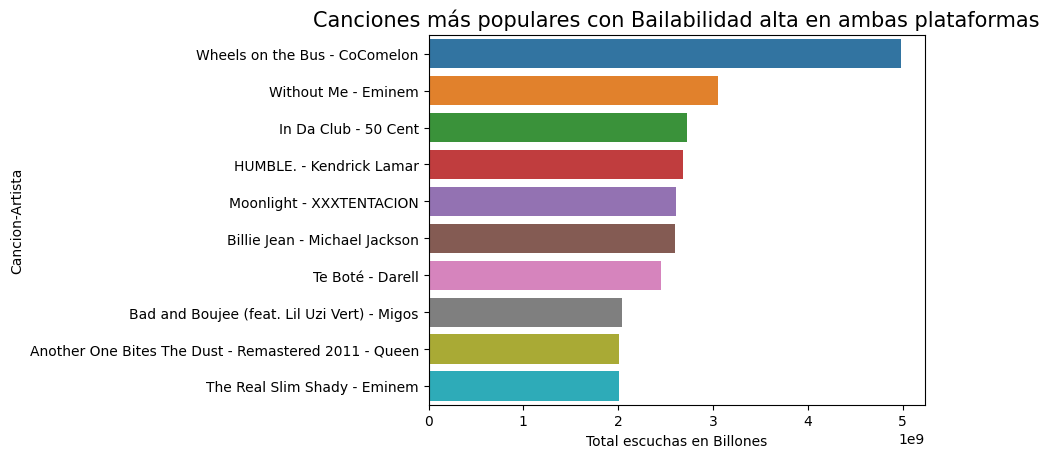

In [61]:
Bailabilidad_cancion = Sp_Yt.groupby(['Cancion-Artista','Bailabilidad']).sum().reset_index()
Bailabilidad_cancion = Bailabilidad_cancion[Bailabilidad_cancion['Bailabilidad'] > 0.9].sort_values('Escuchas_Totales',ascending=False).head(10)

fig = sns.barplot(Bailabilidad_cancion,y='Cancion-Artista',x='Escuchas_Totales')
fig.set_title("Canciones más populares con Bailabilidad alta en ambas plataformas",fontsize=15)
fig.set_xlabel("Total escuchas en Billones")
plt.show();

* **Emocion:** es una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con un alto valor de valence suenan más positivas (por ejemplo, alegres, felices, eufóricas), mientras que las pistas con un bajo valor de emoción suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

In [62]:
# Vemos los estadisticos de la variable
Sp_Yt.Emocion.describe()

count    19537.000000
mean         0.536373
std          0.242204
min          0.030100
25%          0.345000
50%          0.543000
75%          0.731000
max          0.991000
Name: Emocion, dtype: float64

In [63]:
# Vemos las canciones con más alegres
Emocion_divertida = (Sp_Yt.groupby(['Cancion','Artista'])[['Emocion']].max()).sort_values(['Emocion'], ascending=False).head(10)
Emocion_divertida

,,Emocion
Cancion,Artista,
El Tucanazo,Los Tucanes De Tijuana,0.991
Feliz Feliz,Mi Banda El Mexicano,0.990
La Recia,Los Dareyes De La Sierra,0.989
Long Drives,BoyWithUke,0.986
Al gato y al ratón,Banda Machos,0.985
What a Fool Believes,The Doobie Brothers,0.985
She Works Hard For The Money,Donna Summer,0.984
Sergio el Bailador,Bronco,0.984
Quién Se Anima,Gerardo Ortiz,0.982


In [64]:
Emocion_aburrida = (Sp_Yt.groupby(['Titulo_video','Artista'])[['Emocion']].max()).sort_values(['Emocion'], ascending=True).head(11)
Emocion_aburrida

Emocion
Titulo_video                                       Artista                     
Holst: The Planets, Op. 32 - 2. Venus, the Brin... Herbert von Karajan   0.0301
Grieg Lyric Pieces Book V, Op.54 - 4. Notturno     Edvard Grieg          0.0302
Barber: Adagio for Strings / Rattle · Berliner ... Sir Simon Rattle      0.0306
After Dark x Sweater Weather                       11:11 Music Group     0.0307
                                                   creamy                0.0307
Daniel Hope – Baranowski: Biafra | Yellow Loung... Daniel Hope           0.0310
Lauridsen: Lux aeterna - II. In te, domine, spe... I Virtuosi Italiani   0.0315
REZZ & deadmau5 - Hypnocurrency                    deadmau5              0.0324
Aphex Twin - Come To Daddy (Director's Cut)        Aphex Twin            0.0326
Symphony No. 5 in C-Sharp Minor: IV. Adagietto     Daniel Barenboim      0.0327
Hardwell feat. Metallica - Nothing Else Matters... Hardwell              0.0331

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 99.20615843909036 > 0.787 para alpha de 5.0% 


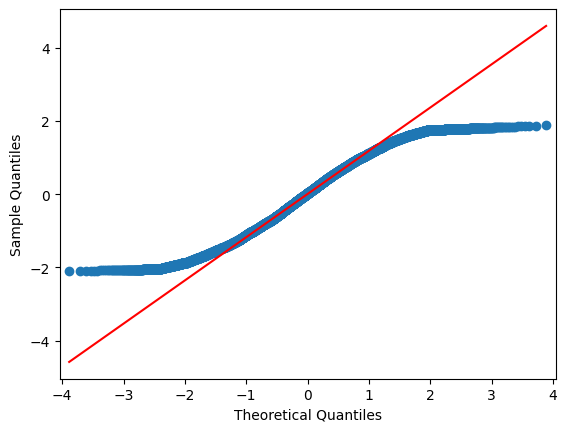

In [65]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Emocion"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Emocion)[0],anderson(Sp_Yt.Emocion)[1][2],anderson(Sp_Yt.Emocion)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Emocion"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

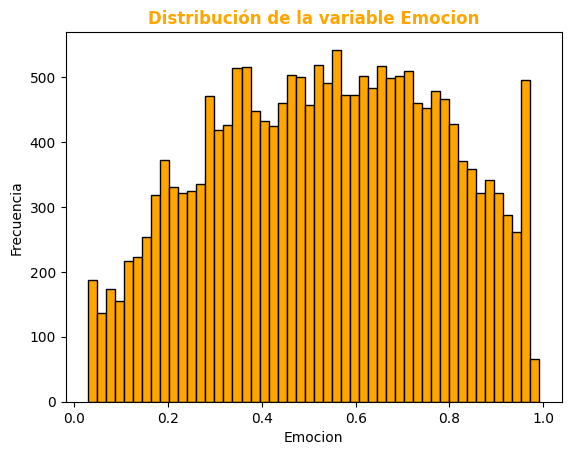

In [66]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Emocion"], bins=50,color="#FFA500", edgecolor='black')
plt.xlabel('Emocion')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Emocion',color="#FFA500",fontweight='bold');

In [67]:
Sp_Yt["Emocion"].describe()

count    19537.000000
mean         0.536373
std          0.242204
min          0.030100
25%          0.345000
50%          0.543000
75%          0.731000
max          0.991000
Name: Emocion, dtype: float64

In [68]:
Sp_Yt["Emocion"].mode().count()

1

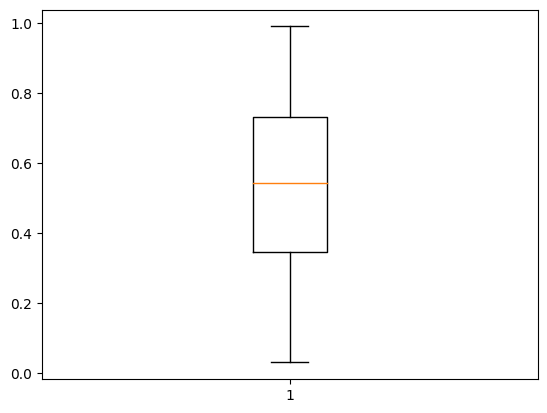

In [69]:
# Hacemos un gráfico de caja
plt.boxplot(Sp_Yt.Emocion);
# whim

* **Energia:** Va de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Normalmente, las pistas energéticas son rápidasy ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras la musica clásica puntúa bajo en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la velocidad de inicio y la entropía general.

In [70]:
# Vemos los estadisticos de la variable
Sp_Yt.Energia.describe()

count    19537.000000
mean         0.643056
std          0.207288
min          0.001440
25%          0.519000
50%          0.672000
75%          0.801000
max          0.998000
Name: Energia, dtype: float64

In [71]:
# Vemos las canciones más energicas
Top_Energia = (Sp_Yt.groupby(['Cancion','Artista'])[['Energia']].max()).sort_values(['Energia'], ascending=False).head(10)
Top_Energia


,,Energia
Cancion,Artista,
Voodoo People,The Prodigy,0.998
Maria - Radio Edit,Scooter,0.997
No Good (Start the Dance),The Prodigy,0.996
El libro de las sombras,Mägo de Oz,0.996
Lux Æterna,Metallica,0.996
Redneck,Lamb of God,0.996
Wait and Bleed,Slipknot,0.996
L'enfant sauvage,Gojira,0.995
Waking the Demon,Bullet For My Valentine,0.995


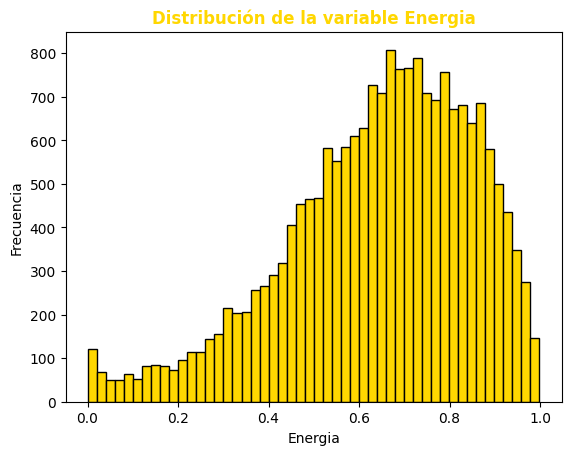

In [72]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Energia"], bins=50,color="#FFD700", edgecolor='black')
plt.xlabel('Energia')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Energia',color="#FFD700",fontweight='bold');

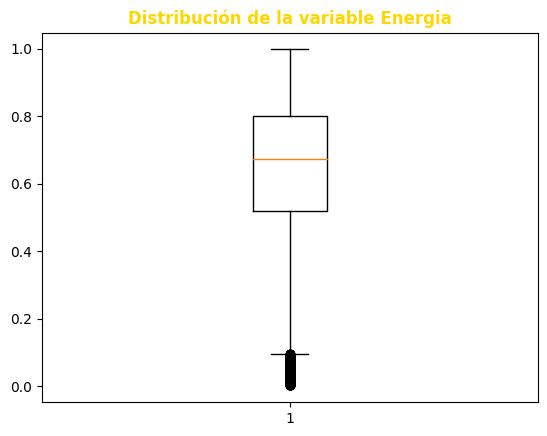

In [73]:
# Hacemos un gráfico de caja para ver como se distribuyen los valores
plt.boxplot(Sp_Yt.Energia);
plt.title('Distribución de la variable Energia',color="#FFD700",fontweight='bold');

In [74]:
# Vemos las canciones que tienen energia menor a 0.1
Sp_Yt[Sp_Yt["Energia"]<0.1].tail()

,Artista,Cancion,Album,Tipo_album,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Titulo_video,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista,Escuchas_Totales
20283,Kato,Sadness and Sorrow (Naruto),Sleep Anime Lofi Beats,album,0.476,0.0792,-28.425,0.0304,0.707,0.3430,0.138,56.997,1.30,Naruto Vibes - Sadness and Sorrow (Kato Cover),109319.0,2690.0,102.0,8638487.0,Sadness and Sorrow (Naruto) - Kato,8747806.0
20284,Kato,Unravel Lofi (Tokyo Ghoul),Sleep Anime Lofi Beats,album,0.481,0.0888,-23.984,0.0330,0.949,0.0989,0.427,170.309,1.01,Tokyo Ghoul - Unravel (Kato Cover),43266.0,1307.0,62.0,8081278.0,Unravel Lofi (Tokyo Ghoul) - Kato,8124544.0
20285,Kato,Pokémon Theme Lofi,Sleep Anime Lofi Beats,album,0.489,0.0806,-27.124,0.0286,0.927,0.1090,0.161,94.010,1.34,Pokemon Theme Song But It's Lofi hip hop,27831.0,754.0,44.0,7758635.0,Pokémon Theme Lofi - Kato,7786466.0
20288,Kato,Konoha Peace (Naruto),Sleep Anime Lofi Beats,album,0.617,0.0806,-24.894,0.0348,0.936,0.1210,0.289,98.165,1.46,Naruto Vibes - Konoha Peace (Kato Cover),206367.0,7576.0,182.0,7167148.0,Konoha Peace (Naruto) - Kato,7373515.0
20291,Kato,Inferno Lofi (Fire Force),Sleep Anime Lofi Beats,album,0.475,0.0733,-29.102,0.0318,0.898,0.0908,0.135,94.218,1.29,inferno (Fire Force but is it okay if it's lof...,1841506.0,56803.0,1698.0,6699893.0,Inferno Lofi (Fire Force) - Kato,8541399.0


Notamos que los valores con menor energia son los denominados Lo-Fi

«Lo-Fi» viene de las palabras en inglés low fidelity, que significa baja calidad. Y es que la música de este género destaca por estar mal grabada para conseguir un efecto nostálgico. Aunque cuando empezó a usarse el término, para acuñar uno de los estilos en boga del pop y el rock alternativo de los 90, lo fuera más por estrechez presupuestaria que por una cuestión estética. Son listas de reproducción con cientos de canciones y con animaciones en bucle que suelen tener una duración infinita en YouTube y que se retransmiten en directo. De esta forma, los usuarios pueden sentirse acompañados de manera continuada con la reproducción de estos vídeos
<!-- Fuente https://mussica.info/cultura/que-es-el-lo-fi-el-genero-que-triunfa-en-youtube-fusionando-musica-e-ilustracion -->

Según el test Normal la variable no parece tener una distribución normal. p_valor = 3.014507355049082e-299 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 164.83747576469614 > 0.787 para alpha de 5.0% 


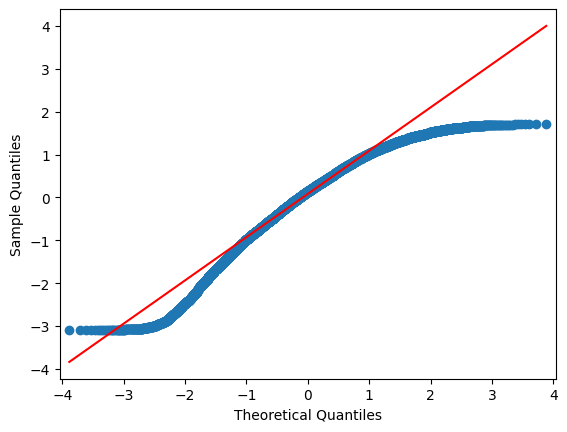

In [75]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Energia"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Energia)[0],anderson(Sp_Yt.Energia)[1][2],anderson(Sp_Yt.Energia)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Energia"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

In [76]:
anderson(Sp_Yt.Energia)

AndersonResult(statistic=164.83747576469614, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.643055629830578, scale=0.20728797002886223)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

* **En_vivo:** Detecta la presencia de una audiencia en la grabación. Valores más altos de liveness representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor por encima de 0.8 indica una fuerte probabilidad de que la pista sea en vivo.

In [77]:
# Vemos los estadisticos de En_vivo
Sp_Yt.En_vivo.describe()

count    19537.000000
mean         0.192831
std          0.167753
min          0.014500
25%          0.093900
50%          0.125000
75%          0.236000
max          1.000000
Name: En_vivo, dtype: float64

In [78]:
# Vemos las canciones más energicas
Top_vivo = (Sp_Yt.groupby(['Cancion-Artista',])[['En_vivo']].max()).sort_values(['En_vivo'], ascending=False).head(10)
Top_vivo

,En_vivo
Cancion-Artista,
Me Quedo Contigo (Si Me Das A Elegir) - Live Baïonarena - Manu Chao,1.000
El Próximo Viernes - Live Version - Thalia,0.997
À Sua Maneira (De Música Ligera) - Ao Vivo - Capital Inicial,0.990
Eu Vou Estar - Ao Vivo - Capital Inicial,0.986
Natasha - Ao Vivo - Capital Inicial,0.984
Anunciação - Ao Vivo - Alceu Valença,0.984
Leave The Door Open - Live - Silk Sonic,0.984
"Okie From Muskogee - Live - Hank Williams, Jr.",0.984
Okie From Muskogee - Live - Sheryl Crow,0.984


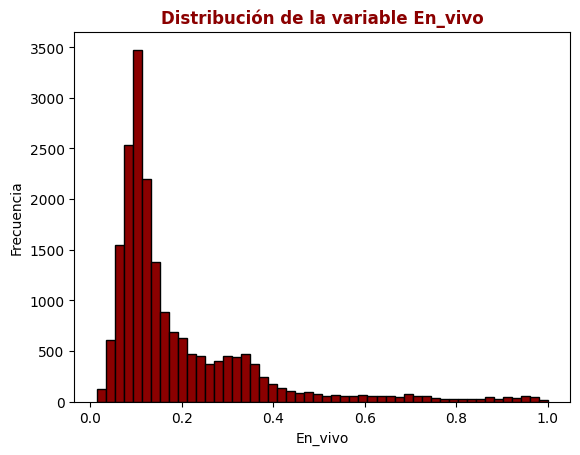

In [79]:
# Hacemos un Histograma para ver como se distribuye la variable En_vivo
plt.hist(Sp_Yt["En_vivo"], bins=50, color="#8B0000", edgecolor='black')
plt.xlabel('En_vivo')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable En_vivo',color="#8B0000",fontweight='bold');

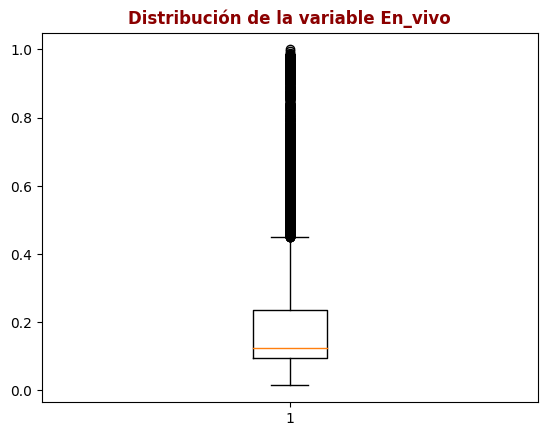

In [80]:
# Hacemos un gráfico de caja para ver que tan agrupados están los valores
plt.boxplot(Sp_Yt.En_vivo);
plt.title('Distribución de la variable En_vivo',color="#8B0000",fontweight='bold');

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 1651.9051305852845 > 0.787 para alpha de 5.0% 


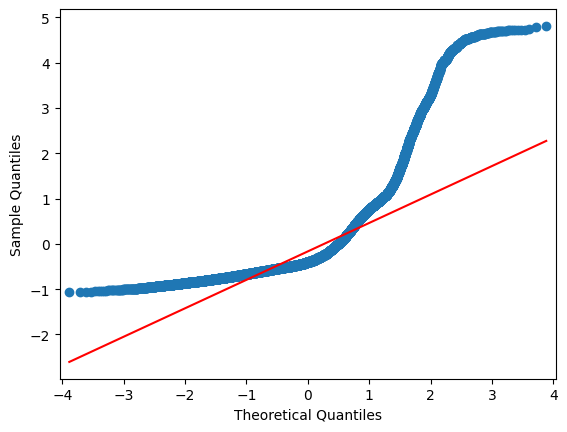

In [81]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["En_vivo"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.En_vivo)[0],anderson(Sp_Yt.En_vivo)[1][2],anderson(Sp_Yt.En_vivo)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["En_vivo"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

* **Tempo:**  Es el tempo estimado en general de una pista, medido en pulsaciones por minuto (BPM: beats per minute). En terminología musical, el tempo se refiere a la velocidad o ritmo de una pieza musical y se deriva directamente de la duración promedio de los pulsos. Se calcula a partir de la duración promedio de los pulsos o golpes que conforman el ritmo de una pista. Por ejemplo, una pista con un tempo alto tendrá un ritmo rápido, mientras que una pista con un tempo bajo tendrá un ritmo más lento.

In [82]:
# Vemos los estadisticos de la variable
Sp_Yt.Tempo.describe()

count    19537.000000
mean       121.120305
std         29.265404
min         37.114000
25%         97.311000
50%        119.996000
75%        139.979000
max        243.372000
Name: Tempo, dtype: float64

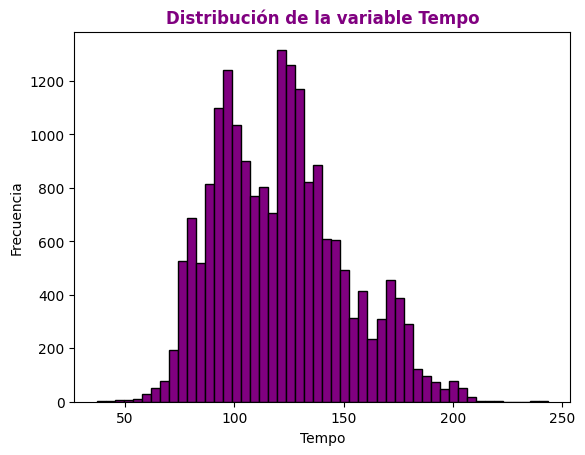

In [83]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Tempo"], bins=50,color="purple", edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Tempo',color="purple",fontweight='bold');

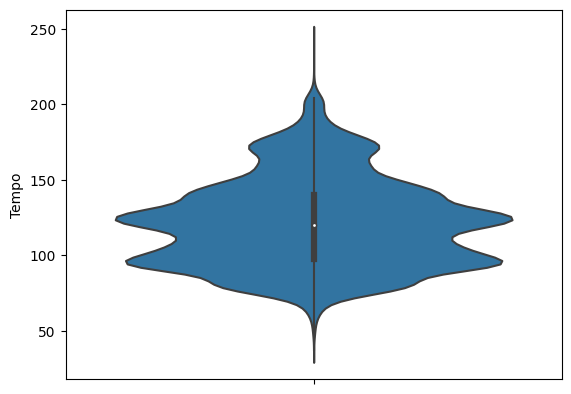

In [84]:
# Para ver como están distribuidas las canciones segun su Tempo realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Tempo'])
plt.show()

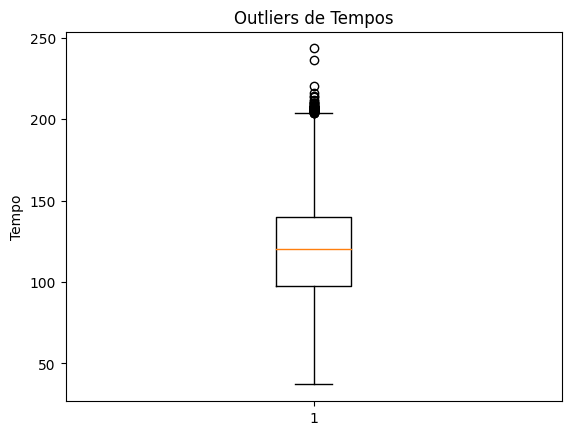

In [85]:
# Crear un gráfico de caja para ver como se comportan los outliers las canciones más altas
plt.boxplot(Sp_Yt["Tempo"])

# Etiquetas y título del gráfico
plt.ylabel("Tempo")
plt.title("Outliers de Tempos")
plt.show()

In [86]:
# Las canciones más movidas
Tempo_alto = (Sp_Yt.groupby(['Cancion','Artista'])[['Tempo']].max()).sort_values(['Tempo'], ascending=False).head(10)
Tempo_alto

,,Tempo
Cancion,Artista,
Call The Doctor,J.J. Cale,243.372
Chale (feat. Clementine Douglas),Riton,236.059
Mama Cry,YNW Melly,220.099
Jesus Just Left Chicago - 2006 Remaster,ZZ Top,215.918
Permitame,Tony Dize,214.025
snowfall (Sped Up),Øneheart,213.503
Pull up to Mi Bumper,Konshens,211.958
Buttons,The Pussycat Dolls,210.857
Go Where You Wanna Go,The Mamas & The Papas,209.953


In [87]:
# Las canciones más tranquilas
Tempo_bajo = (Sp_Yt.groupby(['Cancion','Artista'])[['Tempo']].max()).sort_values(['Tempo'], ascending=True).head(12)
Tempo_bajo

Tempo
Cancion                                            Artista                         
Still Crazy After All These Years                  Paul Simon                37.114
Superficial Love                                   Ruth B.                   43.509
Tchaikovsky: The Nutcracker, Op. 71, Act II: No... Berliner Philharmoniker   47.362
                                                   Pyotr Ilyich Tchaikovsky  47.362
                                                   Sir Simon Rattle          47.362
My Tears Are Becoming A Sea                        M83                       48.637
Tennessee Whiskey                                  Chris Stapleton           48.718
All Star                                           Cássia Eller              49.286
Ocean Prime (feat. Boldy James)                    The Alchemist             49.305
Path of the Wind (My Neighbor Totoro)              Kato                      50.320
Life After You                                     Daughtry                  51.316
Weekend Love                                       Dwele                     51.400

Según el test Normal la variable no parece tener una distribución normal. p_valor = 2.0603013978866057e-156 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 112.58154750850736 > 0.787 para alpha de 5.0% 


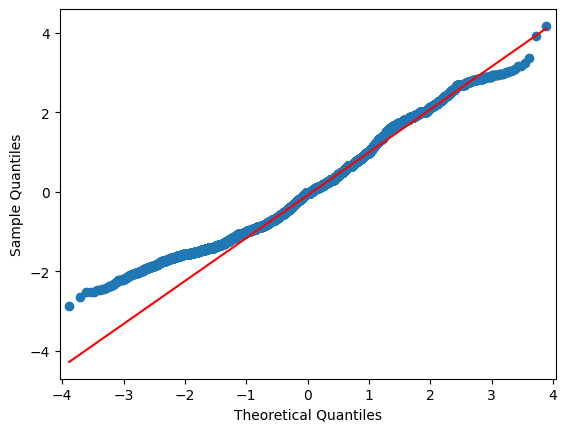

In [88]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Tempo"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Tempo)[0],anderson(Sp_Yt.Tempo)[1][2],anderson(Sp_Yt.Tempo)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Tempo"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

* **Acustica:** Sirve para medir la probabilidad de que una pista sea acústica. Es una medida de confianza que varía de 0.0 a 1.0. Un valor de 1.0 indica una alta confianza de que la pista es completamente acústica, es decir, que se interpreta utilizando instrumentos musicales acústicos en lugar de instrumentos electrónicos o amplificados.

In [89]:
Sp_Yt.Acustica.describe()

count    19537.000000
mean         0.279614
std          0.279540
min          0.000001
25%          0.041900
50%          0.181000
75%          0.455000
max          0.996000
Name: Acustica, dtype: float64

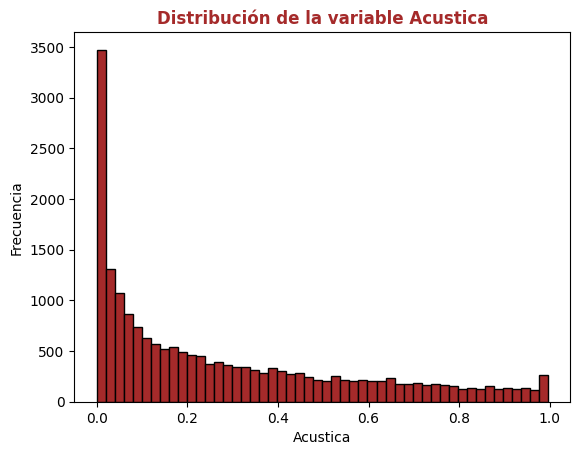

In [90]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Acustica"], bins=50,color="brown", edgecolor='black')
plt.xlabel('Acustica')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Acustica',color="brown",fontweight='bold');

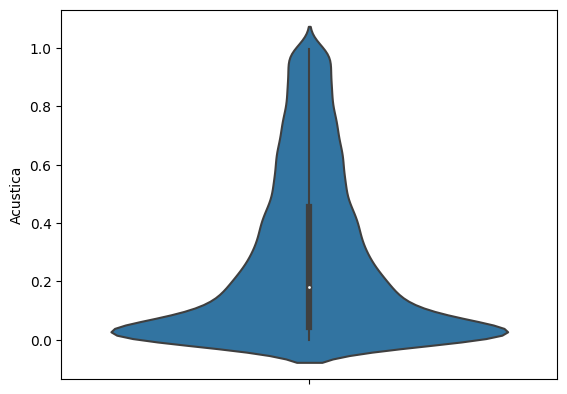

In [91]:
# Para ver como están distribuidas las canciones segun su Tempo realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Acustica'])
plt.show()

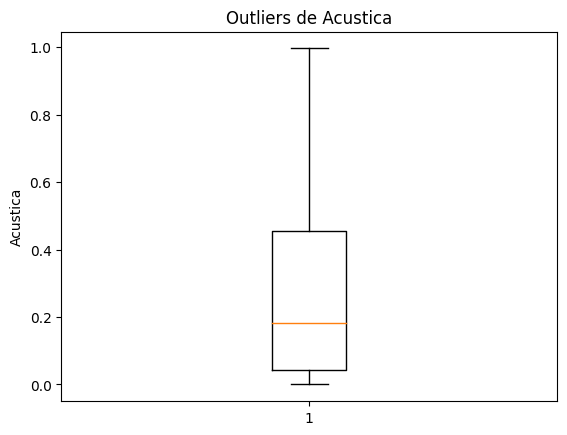

In [92]:
# Crear un gráfico de caja para ver como se comportan los outliers las canciones más altas
plt.boxplot(Sp_Yt["Acustica"])

# Etiquetas y título del gráfico
plt.ylabel("Acustica")
plt.title("Outliers de Acustica")
plt.show()

In [93]:
# Las canciones más Acusticas
Acustica_alta = (Sp_Yt.groupby(['Cancion','Artista'])[['Acustica']].max()).sort_values(['Acustica'], ascending=False).head(10)
Acustica_alta
# Mucha muscia clasica

,,Acustica
Cancion,Artista,
P.S. I Love You,John Powell,0.996
"Kinderszenen, Op. 15: 7. Träumerei",Robert Schumann,0.996
Avril 14th,Aphex Twin,0.996
"Lyric Pieces Book I, Op. 12: No. 1 Arietta",Edvard Grieg,0.996
Gnossienne: No. 1,Erik Satie,0.996
Gnossienne No. 1,Erik Satie,0.996
"Lyric Pieces, Book 1, Op. 12: Arietta",Edvard Grieg,0.996
A Catalogue of Afternoons,Max Richter,0.996
"Kinderszenen, Op. 15: No. 10 Fast zu ernst",Robert Schumann,0.996


In [94]:
# Las canciones menos Acusticas
Acustica_baja = (Sp_Yt.groupby(['Cancion','Artista'])[['Acustica']].max()).sort_values(['Acustica'], ascending=True).head(10)
Acustica_baja
# Heavy metal

,,Acustica
Cancion,Artista,
Sex Type Thing - 2017 Remaster,Stone Temple Pilots,0.000001
Becoming,Volbeat,0.000002
Only for the Weak,In Flames,0.000002
The Heaviest Matter of the Universe,Gojira,0.000003
Silvera,Gojira,0.000003
HAPPY HAPPY DOLL,Youjeen,0.000004
Toxic garbage island,Gojira,0.000004
Mouth for War,Pantera,0.000004
Soft,Motionless In White,0.000005


Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 883.7277861065377 > 0.787 para alpha de 5.0% 


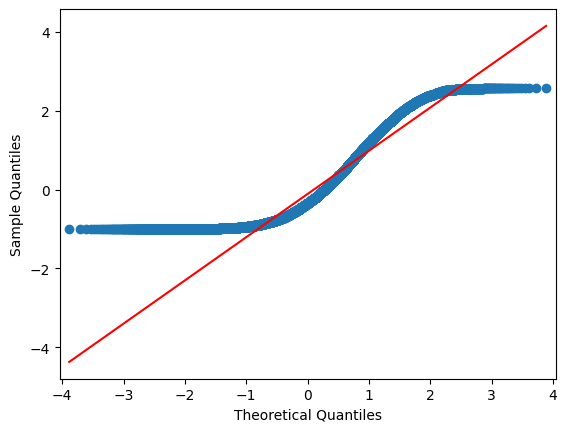

In [95]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Acustica"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Acustica)[0],anderson(Sp_Yt.Acustica)[1][2],anderson(Sp_Yt.Acustica)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Acustica"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

**Sonoridad:** Se refiere al volumen o nivel de intensidad global de una pista musical y se mide en decibelios (dB). 
Los valores de sonoridad se promedian en toda la pista para obtener una medida representativa del volumen general. Esta medida es útil para comparar el volumen relativo entre diferentes pistas. La sonoridad es la cualidad de un sonido que se asocia psicológicamente con su intensidad física, que se representa mediante la amplitud de la onda sonora. En otras palabras, la sonoridad es la percepción subjetiva de la fuerza o el nivel de volumen de un sonido. Los valores de sonoridad típicamente oscilan entre -60 y 0 dB, donde los valores más cercanos a 0 dB indican un volumen más alto, y los valores más cercanos a -60 dB indican un volumen más bajo.

In [96]:
Sp_Yt.Sonoridad.describe()

count    19537.000000
mean        -7.390913
std          4.250326
min        -44.761000
25%         -8.588000
50%         -6.425000
75%         -4.871000
max          0.920000
Name: Sonoridad, dtype: float64

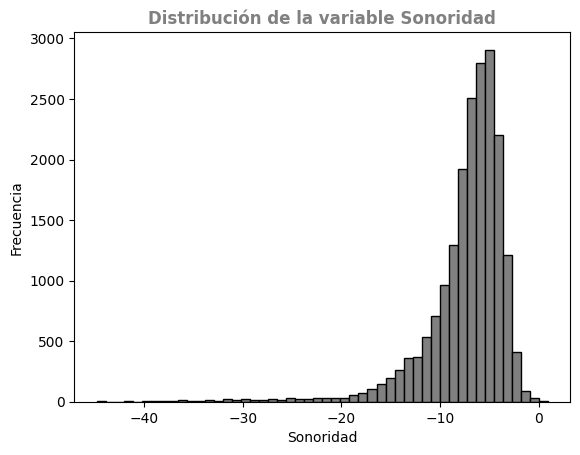

In [97]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Sonoridad"], bins=50,color="grey", edgecolor='black')
plt.xlabel('Sonoridad')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Sonoridad',color="grey",fontweight='bold');

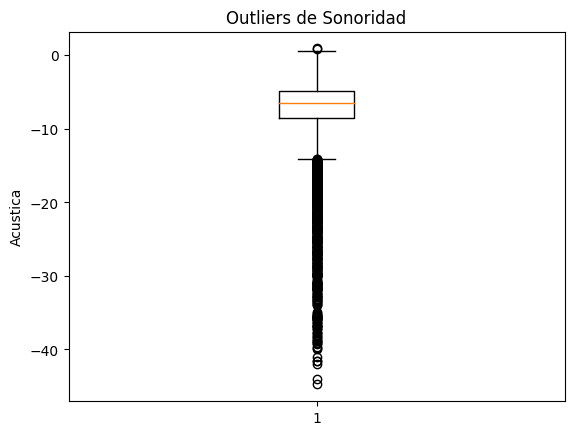

In [98]:
# Crear un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Sonoridad"])

# Etiquetas y título del gráfico
plt.ylabel("Acustica")
plt.title("Outliers de Sonoridad")
plt.show()

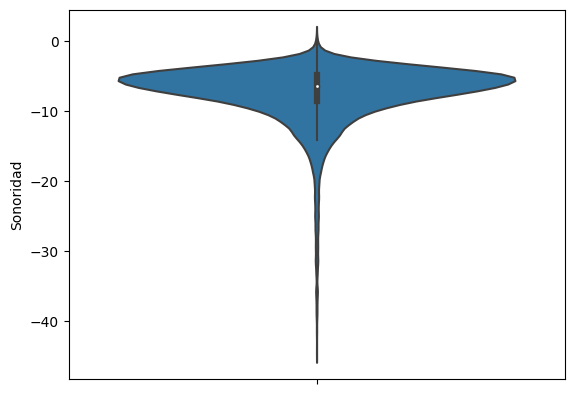

In [99]:
# Para ver como están distribuidas las canciones segun su Sonoridad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Sonoridad'])
plt.show()

In [100]:
# Las canciones más Acusticas
Sonoridad_alta = (Sp_Yt.groupby(['Titulo_video','Artista'])[['Sonoridad']].max()).sort_values(['Sonoridad'], ascending=False).head(10)
Sonoridad_alta
# Vemos que hay unos outliers, no pude ser mayor que 0
# Como no se han movido por mucho los valores, los sustituimos a todos por -0.1
Sp_Yt['Sonoridad'] = Sp_Yt['Sonoridad'].apply(lambda x: -0.1 if x > 0 else x)
Sonoridad_alta

,,Sonoridad
Titulo_video,Artista,
Sub Focus - Siren (Visualiser),Sub Focus,0.920
EXSCAPE,Montell Fish,0.829
"#Video | ले ले आई कोका कोला | #Khesari Lal Yadav, #Shilpi Raj | Le Le Aayi Coca Cola | Chaita Geet",Shilpi Raj,0.561
Me Gusta Estar Contigo - Sergio Vega,"Sergio Vega ""El Shaka""",0.522
"Diplo, French Montana & Lil Pump ft. Zhavia Ward - Welcome To The Party (Official Music Video)",French Montana,0.175
Cascada - Everytime We Touch (Fallen Superhero Hardstyle Remix),Cascada,0.006
Sergio Vega - Dueño De Ti (Video),"Sergio Vega ""El Shaka""",-0.007
Dr. Dre - What's the Difference .ft. Eminem & X-Zibit [ Fan-Made Video ],Dr. Dre,-0.140
Kordhell & Scarlxrd - I FEEL ALIVE (Lyrics),Kordhell,-0.142


In [101]:
# Las canciones más Acusticas
Sonoridad_baja = (Sp_Yt.groupby(['Titulo_video','Artista'])[['Sonoridad']].max()).sort_values(['Sonoridad'], ascending=True).head(10)
Sonoridad_baja

,,Sonoridad
Titulo_video,Artista,
"Erik Satie - Berceuse (Enfantillages Pittoresques, No. 2)",Erik Satie,-44.761
"The Nutcracker Suite, Op. 71a, TH 35: IIb. Danses caractéristiques. Danse de la fée dragée",Claudio Abbado,-43.988
Beethoven Sonata N° 14 'moonlight' Daniel Barenboim,Daniel Barenboim,-41.530
Fabrizio Paterlini - If only I could tell,Fabrizio Paterlini,-39.919
Ludovico Einaudi - Natural Light (Performance Video),Ludovico Einaudi,-39.627
"Schubert Minuet in A major, D. 334 — Arcadi Volodos",Franz Schubert,-39.245
"Alim Beisembayev – Liszt: Consolations, S. 172: III. Lento placido",Franz Liszt,-39.158
"Waltz in A-flat major, Op. 39 No. 15 // BRAHMS",Johannes Brahms,-39.131
Ludovico Einaudi - The Tree,Ludovico Einaudi,-38.901


Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 913.7432038278494 > 0.787 para alpha de 5.0% 


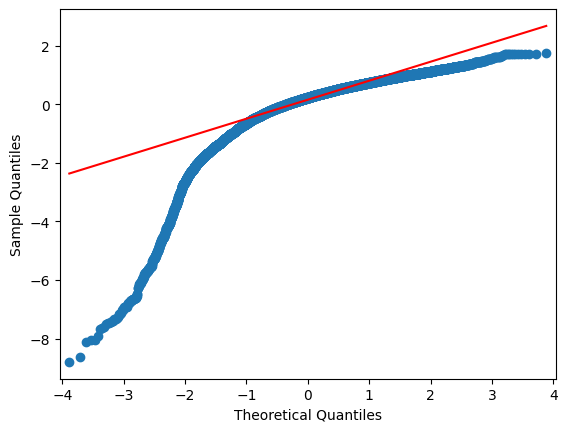

In [102]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Sonoridad"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Sonoridad)[0],anderson(Sp_Yt.Sonoridad)[1][2],anderson(Sp_Yt.Sonoridad)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Sonoridad"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

Impacto emocional: La sonoridad puede influir en cómo percibimos y experimentamos una canción. Canciones con una sonoridad más alta pueden sentirse más enérgicas o potentes, mientras que las de sonoridad más baja pueden parecer más suaves o relajantes.

**Duracion_min:** La duración en minutos de cada cancnion

In [103]:
Sp_Yt.Duracion_min.describe()

count    19537.000000
mean         3.678331
std          1.052871
min          1.010000
25%          3.010000
50%          3.550000
75%          4.170000
max         10.000000
Name: Duracion_min, dtype: float64

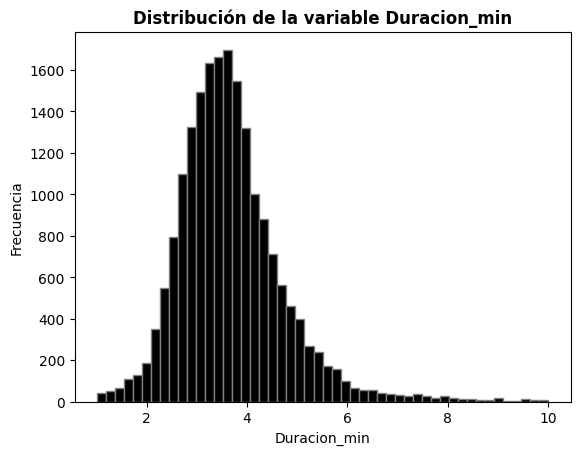

In [104]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Duracion_min"], bins=50,color="black", edgecolor='grey')
plt.xlabel('Duracion_min')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Duracion_min',color="black",fontweight='bold');

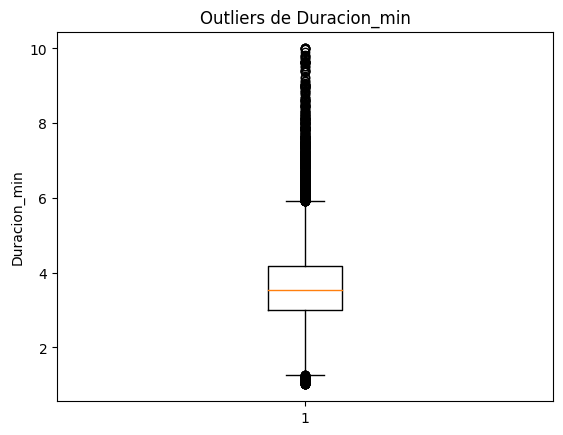

In [105]:
# Crear un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Duracion_min"])

# Etiquetas y título del gráfico
plt.ylabel("Duracion_min")
plt.title("Outliers de Duracion_min")
plt.show()

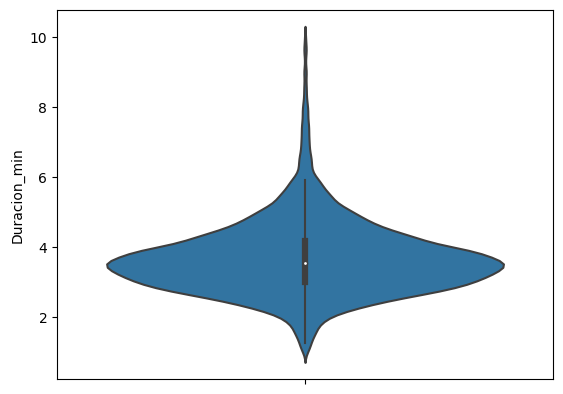

In [106]:
# Para ver como están distribuidas las canciones segun su Sonoridad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Duracion_min'])
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 238.0930311382108 > 0.787 para alpha de 5.0% 


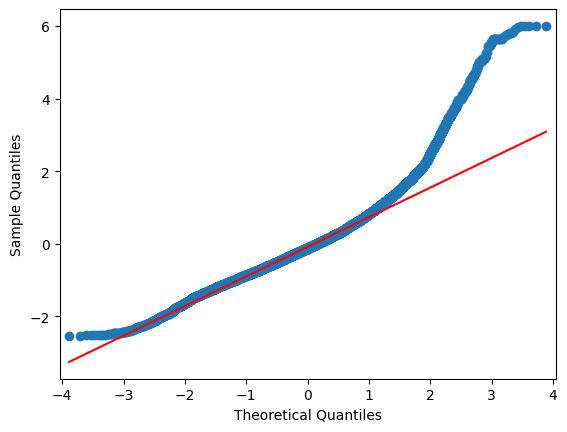

In [107]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Duracion_min"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Duracion_min)[0],anderson(Sp_Yt.Duracion_min)[1][2],anderson(Sp_Yt.Duracion_min)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Duracion_min"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

**Visualizaciones_YT:** Número de visualizaciones que tiene una canción en Youtube

In [108]:
Sp_Yt.Visualizaciones_YT.describe()

count    1.953700e+04
mean     9.603533e+07
std      2.779517e+08
min      8.000000e+00
25%      2.039376e+06
50%      1.555879e+07
75%      7.226534e+07
max      8.079649e+09
Name: Visualizaciones_YT, dtype: float64

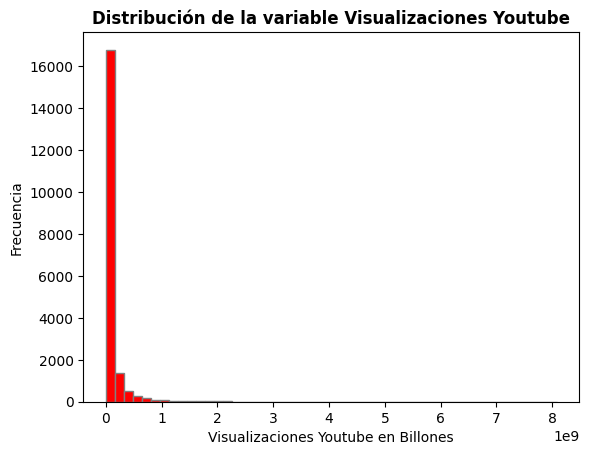

In [109]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Visualizaciones_YT"], bins=50,color="red", edgecolor='grey')
plt.xlabel('Visualizaciones Youtube en Billones')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Visualizaciones Youtube',color="black",fontweight='bold');

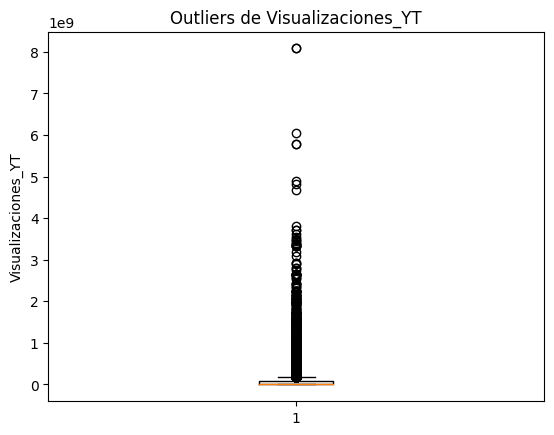

In [110]:
# Crear un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Visualizaciones_YT"])

# Etiquetas y título del gráfico
plt.ylabel("Visualizaciones_YT")
plt.title("Outliers de Visualizaciones_YT")
plt.show()

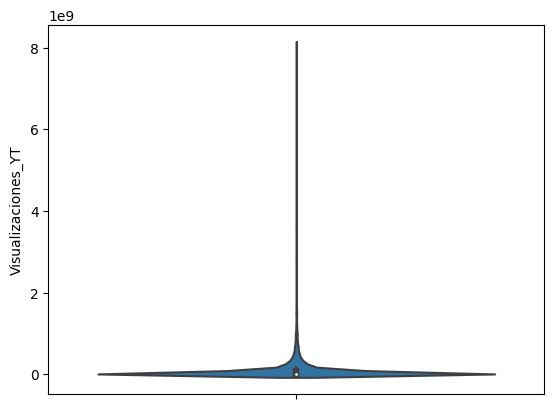

In [111]:
# Para ver como están distribuidas las canciones segun su Sonoridad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Visualizaciones_YT'])
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 3930.5756582217764 > 0.787 para alpha de 5.0% 


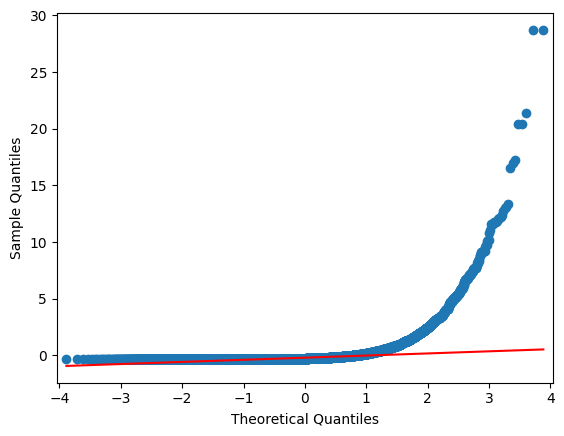

In [112]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Visualizaciones_YT"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Visualizaciones_YT)[0],anderson(Sp_Yt.Visualizaciones_YT)[1][2],anderson(Sp_Yt.Visualizaciones_YT)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Visualizaciones_YT"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

**Reproducciones_SP:** Número de reproducciones que tiene una canción en Spotify

In [113]:
Sp_Yt.Reproducciones_SP.describe()

count    1.953700e+04
mean     1.393704e+08
std      2.456343e+08
min      1.156476e+01
25%      1.877039e+07
50%      5.307617e+07
75%      1.436867e+08
max      3.386520e+09
Name: Reproducciones_SP, dtype: float64

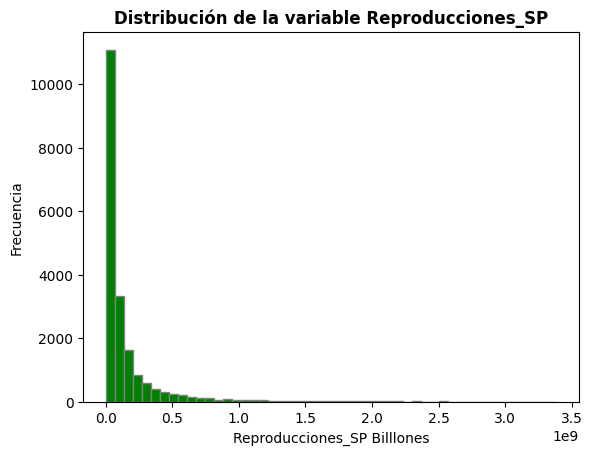

In [114]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Reproducciones_SP"], bins=50,color="green", edgecolor='grey')
plt.xlabel('Reproducciones_SP Billlones')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Reproducciones_SP',color="black",fontweight='bold');

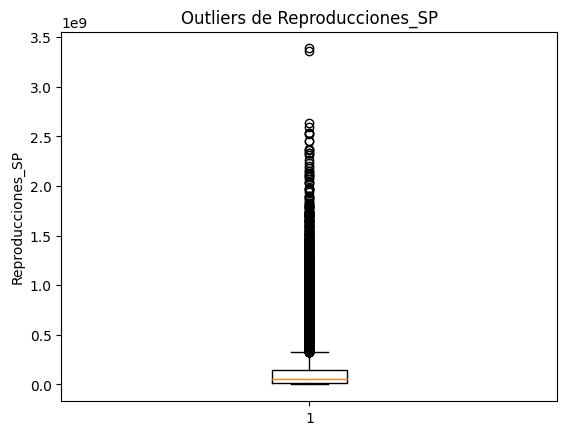

In [115]:
# Crear un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Reproducciones_SP"])

# Etiquetas y título del gráfico
plt.ylabel("Reproducciones_SP")
plt.title("Outliers de Reproducciones_SP")
plt.show()

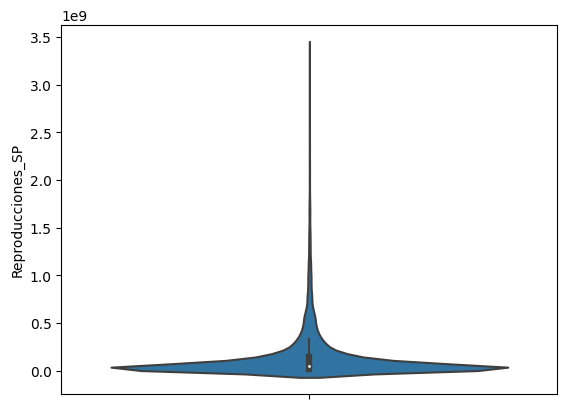

In [116]:
# Para ver como están distribuidas las canciones segun su Sonoridad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Reproducciones_SP'])
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 2687.976495151848 > 0.787 para alpha de 5.0% 


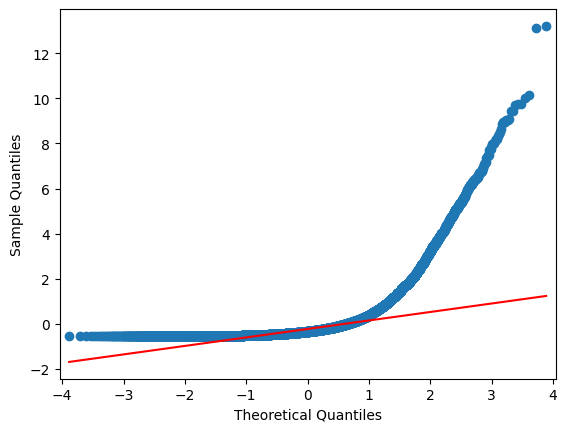

In [117]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Reproducciones_SP"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Reproducciones_SP)[0],anderson(Sp_Yt.Reproducciones_SP)[1][2],anderson(Sp_Yt.Reproducciones_SP)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Reproducciones_SP"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

**Escuchas_Totales:** Suma de visualizaciones en Youtube con las reproducciones de Spotify por canción

In [118]:
Sp_Yt.Escuchas_Totales.describe()

count    1.953700e+04
mean     2.354058e+08
std      4.691430e+08
min      1.956476e+01
25%      2.803106e+07
50%      8.255248e+07
75%      2.321083e+08
max      9.586248e+09
Name: Escuchas_Totales, dtype: float64

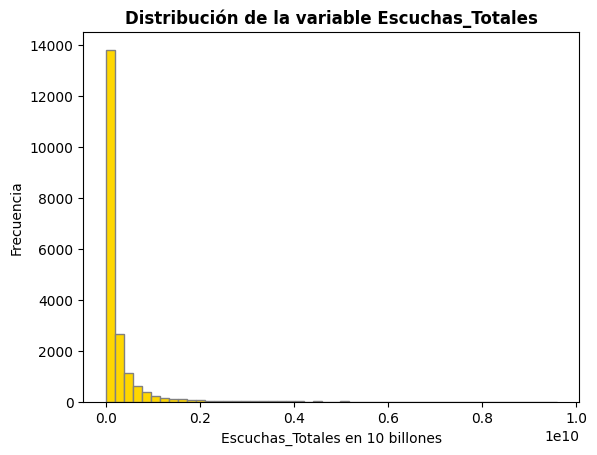

In [119]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Escuchas_Totales"], bins=50,color="gold", edgecolor='grey')
plt.xlabel('Escuchas_Totales en 10 billones')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Escuchas_Totales',color="black",fontweight='bold');


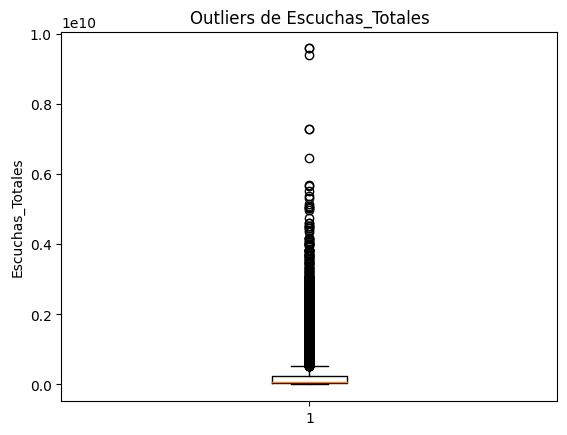

In [120]:
# Crear un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Escuchas_Totales"])

# Etiquetas y título del gráfico
plt.ylabel("Escuchas_Totales")
plt.title("Outliers de Escuchas_Totales")
plt.show()

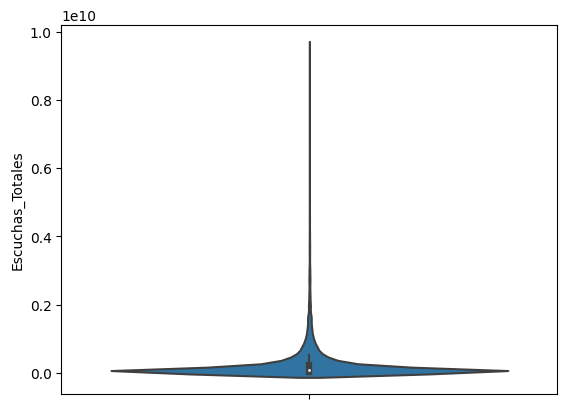

In [121]:
# Para ver como están distribuidas las canciones segun su Sonoridad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Escuchas_Totales'])
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 2967.8001224731197 > 0.787 para alpha de 5.0% 


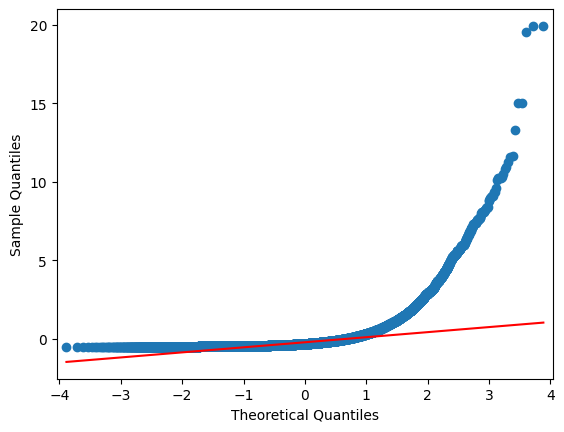

In [122]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Escuchas_Totales"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Escuchas_Totales)[0],anderson(Sp_Yt.Escuchas_Totales)[1][2],anderson(Sp_Yt.Escuchas_Totales)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Escuchas_Totales"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

**Likes_YT:** Número de likes en Youtube por canción

In [123]:
Sp_Yt.Likes_YT.describe()

count    1.953700e+04
mean     6.693507e+05
std      1.805671e+06
min      0.000000e+00
25%      2.222100e+04
50%      1.271600e+05
75%      5.281470e+05
max      5.078865e+07
Name: Likes_YT, dtype: float64

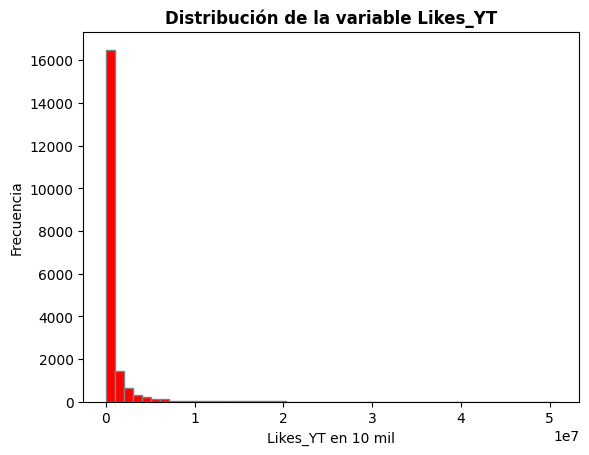

In [124]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Likes_YT"], bins=50,color="red", edgecolor='grey')
plt.xlabel('Likes_YT en 10 mil')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Likes_YT',color="black",fontweight='bold');

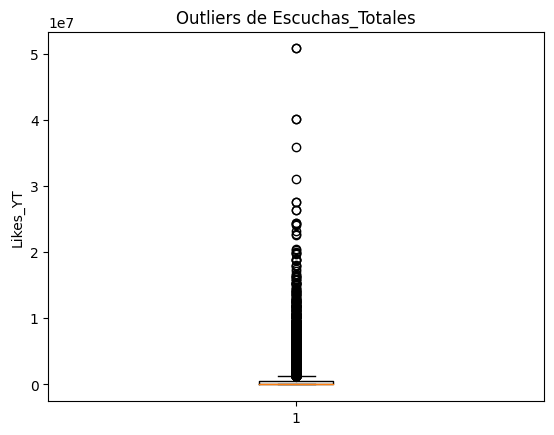

In [125]:
# Crear un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Likes_YT"])

# Etiquetas y título del gráfico
plt.ylabel("Likes_YT")
plt.title("Outliers de Escuchas_Totales")
plt.show()

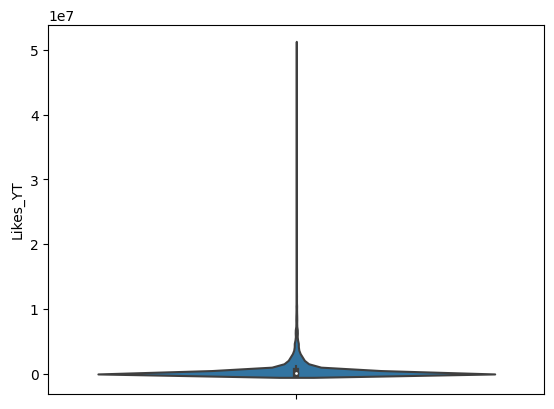

In [126]:
# Para ver como están distribuidas las canciones segun su Sonoridad realizamos el grafico de Violin
sns.violinplot(y=Sp_Yt['Likes_YT'])
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 3746.297774814113 > 0.787 para alpha de 5.0% 


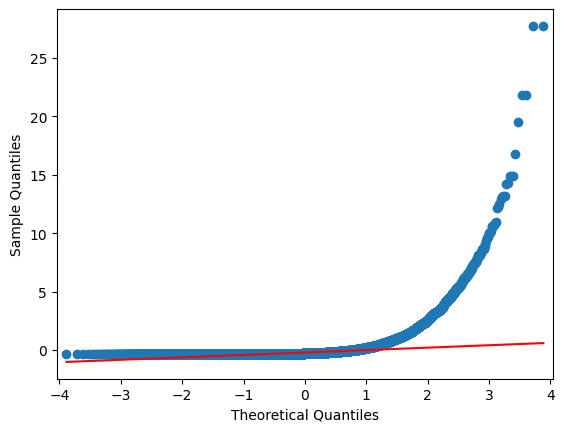

In [127]:

# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Likes_YT"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Likes_YT)[0],anderson(Sp_Yt.Likes_YT)[1][2],anderson(Sp_Yt.Likes_YT)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Likes_YT"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

**Comentarios_YT:** Número de comentarios en Youtube por canción

In [128]:
Sp_Yt.Comentarios_YT.describe()

count    1.953700e+04
mean     2.795956e+04
std      1.961158e+05
min      0.000000e+00
25%      5.340000e+02
50%      3.336000e+03
75%      1.455000e+04
max      1.608314e+07
Name: Comentarios_YT, dtype: float64

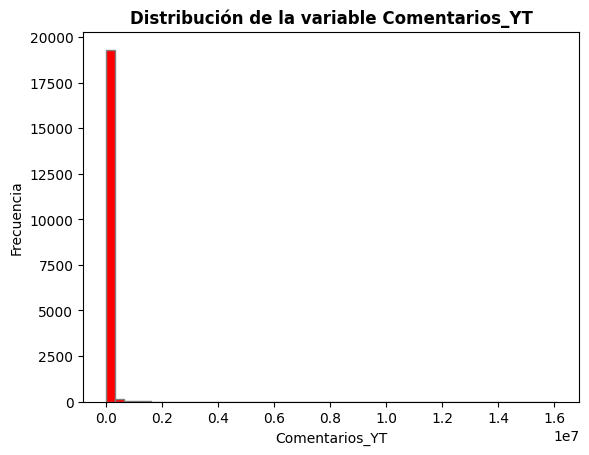

In [129]:
# Hacemos un Histograma para ver los estadisticos de centralidad
plt.hist(Sp_Yt["Comentarios_YT"], bins=50,color="red", edgecolor='grey')
plt.xlabel('Comentarios_YT')
plt.ylabel('Frecuencia') # Es la cantidad de veces que hay una canción en cada valor de Bailabilidad
plt.title('Distribución de la variable Comentarios_YT',color="black",fontweight='bold');

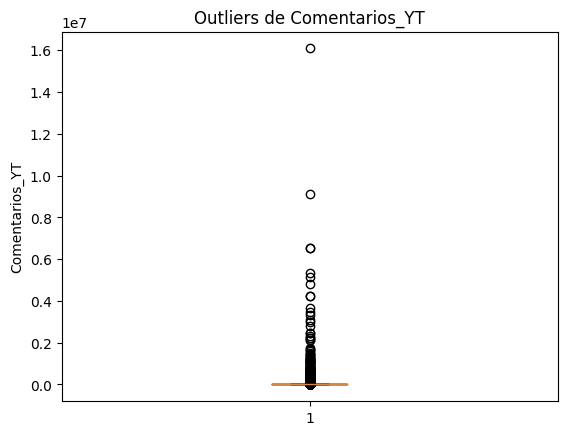

In [130]:
# Creamos un gráfico de caja para ver como se comportan los outliers de la Sonoridad las canciones 
plt.boxplot(Sp_Yt["Comentarios_YT"])

# Etiquetas y título del gráfico
plt.ylabel("Comentarios_YT")
plt.title("Outliers de Comentarios_YT")
plt.show()

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 5659.066772412054 > 0.787 para alpha de 5.0% 


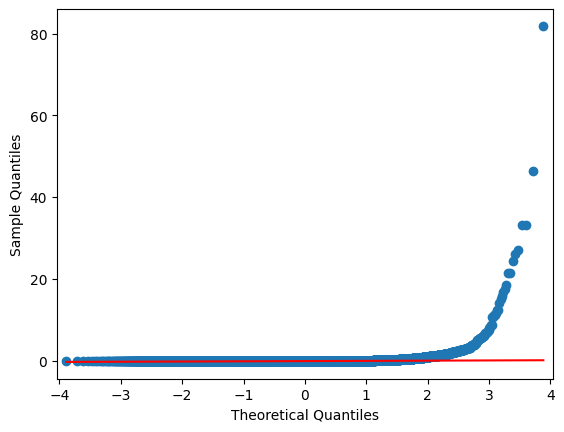

In [131]:
# Prueba de Normalidad de la Variable

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_vallor es menor
nstatic,np_valor = normaltest(Sp_Yt["Comentarios_YT"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(Sp_Yt.Comentarios_YT)[0],anderson(Sp_Yt.Comentarios_YT)[1][2],anderson(Sp_Yt.Comentarios_YT)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(Sp_Yt["Comentarios_YT"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

Tipo_album
album          14096
single          4817
compilation      624
Name: count, dtype: int64


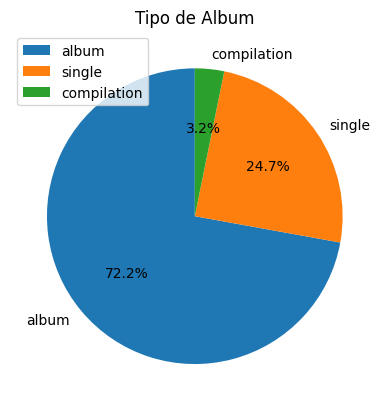

In [132]:
# Tipo de Album
tipo_album = Sp_Yt['Tipo_album'].value_counts()
print(tipo_album)

# Hacemos un grafico pie para saber en proporción que formmato salen las canciones

# Grafico de Pie
labels = tipo_album.index.tolist()
sizes =tipo_album.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Tipo de Album')
plt.legend(labels, loc='upper left')
plt.show()

## 2.2 Multidimensional

### 2.1 TOP ARTISTAS

In [133]:
# Teniendo en cuenta que son solo las reproducciones de 10 canciones
# Agrupamos por artistas y los ordnamos por Escuchas Totales
Top_10_artist_escuchas = (Sp_Yt.groupby('Artista')[['Cancion', 'Album', 'Tipo_album', 'Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'En_vivo', 'Emocion', 'Tempo',
       'Duracion_min', 'Titulo_video', 'Visualizaciones_YT', 'Likes_YT',
       'Comentarios_YT', 'Reproducciones_SP', 'Cancion-Artista','Escuchas_Totales']].sum()).sort_values(['Escuchas_Totales'], ascending=False).head(10)
Top_10_artist_escuchas

,Cancion,Album,Tipo_album,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Titulo_video,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista,Escuchas_Totales
Artista,,,,,,,,,,,,,,,,,,,
Ed Sheeran,PerfectBad HabitsShiversShape of YouPhotograph...,÷ (Deluxe)==÷ (Deluxe)x (Wembley Edition)Celes...,albumalbumalbumalbumalbumsinglealbumalbumalbum...,7.136,6.089,-55.264,0.5744,3.083000,1.7281,5.6600,1056.930,37.63,Ed Sheeran - Perfect (Official Music Video)Ed ...,1.566416e+10,83543319.0,2.520822e+06,1.439488e+10,Perfect - Ed SheeranBad Habits - Ed SheeranShi...,3.005904e+10
Justin Bieber,STAY (with Justin Bieber)GhostPeaches (feat. D...,F*CK LOVE 3+: OVER YOUJusticeJusticePurpose (D...,albumalbumalbumalbumalbumalbumsinglealbumalbum...,6.468,6.003,-68.473,1.0524,3.730100,2.2745,5.6130,1235.776,31.93,"The Kid LAROI, Justin Bieber - STAY (Official ...",1.269867e+10,78584348.0,7.259120e+06,1.209777e+10,STAY (with Justin Bieber) - Justin BieberGhost...,2.479643e+10
Coldplay,YellowViva La VidaSparksSomething Just Like Th...,ParachutesViva La Vida or Death and All His Fr...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,4.727,5.704,-73.571,0.3077,2.070060,1.7793,2.9060,1261.112,43.66,Coldplay - Yellow (Official Video)Coldplay - V...,9.997278e+09,63157895.0,2.124370e+06,1.177848e+10,Yellow - ColdplayViva La Vida - ColdplaySparks...,2.177576e+10
Post Malone,I Like You (A Happier Song) (with Doja Cat)Cir...,Twelve Carat ToothacheHollywood's Bleedingbeer...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,6.693,6.350,-52.050,0.6945,2.213200,1.2998,4.4550,1229.952,32.92,Post Malone - I Like You (A Happier Song) w. D...,6.489674e+09,53974744.0,1.374279e+06,1.525126e+10,I Like You (A Happier Song) (with Doja Cat) - ...,2.174094e+10
Dua Lipa,One Kiss (with Dua Lipa)Cold Heart - PNAU Remi...,One Kiss (with Dua Lipa)The Lockdown SessionsF...,singlealbumalbumalbumalbumalbumalbumalbumsingl...,7.469,7.347,-47.274,0.7142,0.459340,1.4699,6.4090,1162.041,34.11,"Calvin Harris, Dua Lipa - One Kiss (Official V...",8.216339e+09,62627677.0,1.326153e+06,1.340808e+10,One Kiss (with Dua Lipa) - Dua LipaCold Heart ...,2.162442e+10
Bruno Mars,When I Was Your ManLocked out of HeavenThat's ...,Unorthodox JukeboxUnorthodox Jukebox24K MagicA...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,6.933,6.256,-61.202,0.4544,1.979400,1.6883,5.9974,1169.292,35.97,Bruno Mars - When I Was Your Man (Official Mus...,1.038509e+10,59616146.0,1.924316e+06,1.089786e+10,When I Was Your Man - Bruno MarsLocked out of ...,2.128296e+10
Imagine Dragons,BonesBelieverThunderEnemy (with JID) - from th...,Mercury - Acts 1 & 2EvolveEvolveMercury - Acts...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,6.520,7.174,-46.594,0.7861,0.955320,2.5782,4.5197,1247.028,32.24,Imagine Dragons - Bones (Official Music Video)...,9.093785e+09,72274477.0,2.004432e+06,1.185831e+10,Bones - Imagine DragonsBeliever - Imagine Drag...,2.095210e+10
The Weeknd,Creepin' (with The Weeknd & 21 Savage)StarboyB...,HEROES & VILLAINSStarboyAfter HoursMy Dear Mel...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,5.865,6.425,-65.938,0.6643,1.245160,1.8269,2.9200,1276.996,40.05,"Metro Boomin, The Weeknd, 21 Savage - CreepinT...",7.363080e+09,49056880.0,1.587849e+06,1.303197e+10,Creepin' (with The Weeknd & 21 Savage) - The W...,2.039505e+10
Katy Perry,Dark HorseUnconditionallyWhen I’m Gone (with K...,PRISMPRISMWhen I’m Gone (with Katy Perry)PRISM...,albumalbumsinglealbumalbumalbumalbumalbumalbum...,6.818,7.655,-45.860,0.5210,0.411852,2.5363,6.0140,1226.056,35.98,Katy Perry - Dark Horse (Official) ft. Juicy J...,1.312063e+10,63067090.0,3.153267e+06,6.607329e+09,Dark Horse - Katy PerryUnconditionally - Katy ...,1.972796e+10


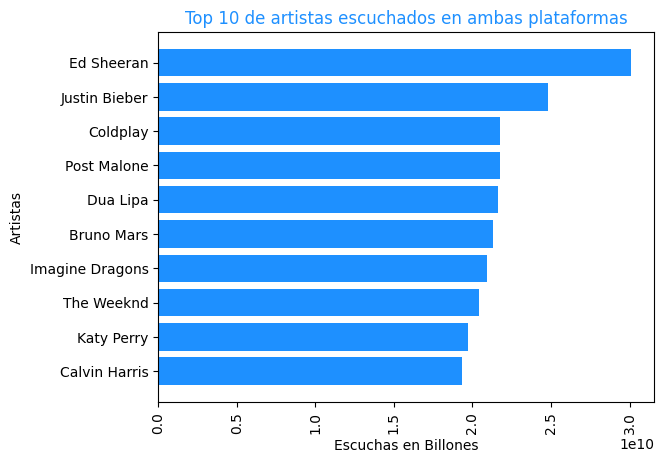

In [134]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los streams
artist_10 = Top_10_artist_escuchas.index
viewsartist_yt = Top_10_artist_escuchas['Escuchas_Totales']
# Ordenar los datos en orden descendente
artist_10 = artist_10[::-1]
viewsartist_yt = viewsartist_yt[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Escuchas en Billones')
ax.set_ylabel('Artistas')
ax.set_title('Top 10 de artistas escuchados en ambas plataformas',color="#1E90FF")
# Graficar los datos
ax.barh(artist_10, viewsartist_yt,color="#1E90FF")
plt.xticks(rotation=90)
plt.show()

#### SPOTIFY

In [135]:
# Artistas más escuchados en cada plataforma
# Spotify
# Teniendo en cuenta que son las 10 mejores canciones de cada artista
# Agrupamos por artistas y los ordnamos por reproducciones de spotify
Top_10_artist_sp = (Sp_Yt.groupby('Artista')[['Cancion', 'Album', 'Tipo_album', 'Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'En_vivo', 'Emocion', 'Tempo',
       'Duracion_min', 'Titulo_video', 'Visualizaciones_YT', 'Likes_YT',
       'Comentarios_YT', 'Reproducciones_SP', 'Cancion-Artista']].sum()).sort_values(['Reproducciones_SP'], ascending=False).head(10)
Top_10_artist_sp

,Cancion,Album,Tipo_album,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Titulo_video,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista
Artista,,,,,,,,,,,,,,,,,,
Post Malone,I Like You (A Happier Song) (with Doja Cat)Cir...,Twelve Carat ToothacheHollywood's Bleedingbeer...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,6.693,6.350,-52.050,0.6945,2.21320,1.2998,4.4550,1229.952,32.92,Post Malone - I Like You (A Happier Song) w. D...,6.489674e+09,53974744.0,1.374279e+06,1.525126e+10,I Like You (A Happier Song) (with Doja Cat) - ...
Ed Sheeran,PerfectBad HabitsShiversShape of YouPhotograph...,÷ (Deluxe)==÷ (Deluxe)x (Wembley Edition)Celes...,albumalbumalbumalbumalbumsinglealbumalbumalbum...,7.136,6.089,-55.264,0.5744,3.08300,1.7281,5.6600,1056.930,37.63,Ed Sheeran - Perfect (Official Music Video)Ed ...,1.566416e+10,83543319.0,2.520822e+06,1.439488e+10,Perfect - Ed SheeranBad Habits - Ed SheeranShi...
Dua Lipa,One Kiss (with Dua Lipa)Cold Heart - PNAU Remi...,One Kiss (with Dua Lipa)The Lockdown SessionsF...,singlealbumalbumalbumalbumalbumalbumalbumsingl...,7.469,7.347,-47.274,0.7142,0.45934,1.4699,6.4090,1162.041,34.11,"Calvin Harris, Dua Lipa - One Kiss (Official V...",8.216339e+09,62627677.0,1.326153e+06,1.340808e+10,One Kiss (with Dua Lipa) - Dua LipaCold Heart ...
XXXTENTACION,RevengeHopeEverybody Dies In Their NightmaresJ...,17?1717??17Look At Me!Come Over When You're So...,albumalbumalbumalbumalbumalbumalbumsinglealbum...,7.503,4.960,-81.718,1.3005,4.74970,1.3310,4.1860,1208.087,22.31,XXXTENTACION - Revenge (Audio)XXXTENTACION - H...,5.513164e+09,44228598.0,3.385626e+06,1.322435e+10,Revenge - XXXTENTACIONHope - XXXTENTACIONEvery...
The Weeknd,Creepin' (with The Weeknd & 21 Savage)StarboyB...,HEROES & VILLAINSStarboyAfter HoursMy Dear Mel...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,5.865,6.425,-65.938,0.6643,1.24516,1.8269,2.9200,1276.996,40.05,"Metro Boomin, The Weeknd, 21 Savage - CreepinT...",7.363080e+09,49056880.0,1.587849e+06,1.303197e+10,Creepin' (with The Weeknd & 21 Savage) - The W...
Justin Bieber,STAY (with Justin Bieber)GhostPeaches (feat. D...,F*CK LOVE 3+: OVER YOUJusticeJusticePurpose (D...,albumalbumalbumalbumalbumalbumsinglealbumalbum...,6.468,6.003,-68.473,1.0524,3.73010,2.2745,5.6130,1235.776,31.93,"The Kid LAROI, Justin Bieber - STAY (Official ...",1.269867e+10,78584348.0,7.259120e+06,1.209777e+10,STAY (with Justin Bieber) - Justin BieberGhost...
Imagine Dragons,BonesBelieverThunderEnemy (with JID) - from th...,Mercury - Acts 1 & 2EvolveEvolveMercury - Acts...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,6.520,7.174,-46.594,0.7861,0.95532,2.5782,4.5197,1247.028,32.24,Imagine Dragons - Bones (Official Music Video)...,9.093785e+09,72274477.0,2.004432e+06,1.185831e+10,Bones - Imagine DragonsBeliever - Imagine Drag...
Coldplay,YellowViva La VidaSparksSomething Just Like Th...,ParachutesViva La Vida or Death and All His Fr...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,4.727,5.704,-73.571,0.3077,2.07006,1.7793,2.9060,1261.112,43.66,Coldplay - Yellow (Official Video)Coldplay - V...,9.997278e+09,63157895.0,2.124370e+06,1.177848e+10,Yellow - ColdplayViva La Vida - ColdplaySparks...
Khalid,lovely (with Khalid)NumbSilenceYoung Dumb & Br...,lovely (with Khalid)NumbSilenceAmerican TeenFR...,singlesinglesinglealbumalbumalbumalbumalbumalb...,6.724,5.937,-73.173,1.2387,2.91010,1.1965,3.7250,1124.157,33.11,"Billie Eilish, Khalid - lovelyMarshmello, Khal...",5.398246e+09,46881447.0,1.001265e+06,1.138684e+10,lovely (with Khalid) - KhalidNumb - KhalidSile...


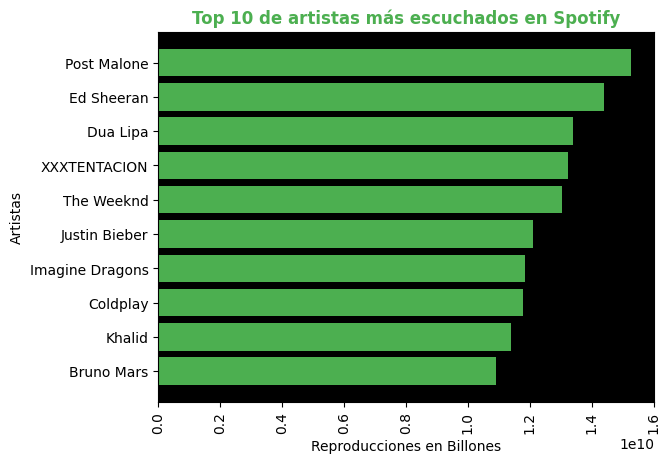

In [136]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los streams
artistsp_10 = Top_10_artist_sp.index
viewsartist_sp = Top_10_artist_sp['Reproducciones_SP']
# Ordenar los datos en orden descendente
artistsp_10 = artistsp_10[::-1]
viewsartist_sp = viewsartist_sp[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Reproducciones en Billones')
ax.set_ylabel('Artistas')
ax.set_title('Top 10 de artistas más escuchados en Spotify',fontweight='bold',color="#4CAF50")
# Graficar los datos
ax.barh(artistsp_10, viewsartist_sp,color="#4CAF50")
ax.set_facecolor('black')
plt.xticks(rotation=90)
plt.show()

#### YOUTUBE

In [137]:
# Teniendo en cuenta que son solo las reproducciones de sus 10 mejores canciones
# Agrupamos por artistas y los ordnamos por visualizaciones de Youtube
Top_10_artist_yt = (Sp_Yt.groupby('Artista')[['Cancion', 'Album', 'Tipo_album', 'Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'En_vivo', 'Emocion', 'Tempo',
       'Duracion_min', 'Titulo_video', 'Visualizaciones_YT', 'Likes_YT',
       'Comentarios_YT', 'Reproducciones_SP', 'Cancion-Artista']].sum()).sort_values(['Visualizaciones_YT'], ascending=False).head(10)
Top_10_artist_yt

,Cancion,Album,Tipo_album,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Titulo_video,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista
Artista,,,,,,,,,,,,,,,,,,
Ed Sheeran,PerfectBad HabitsShiversShape of YouPhotograph...,÷ (Deluxe)==÷ (Deluxe)x (Wembley Edition)Celes...,albumalbumalbumalbumalbumsinglealbumalbumalbum...,7.136,6.089,-55.264,0.5744,3.083000,1.7281,5.6600,1056.930,37.63,Ed Sheeran - Perfect (Official Music Video)Ed ...,1.566416e+10,83543319.0,2520822.0,1.439488e+10,Perfect - Ed SheeranBad Habits - Ed SheeranShi...
CoComelon,Wheels on the BusBaa Baa Black SheepTwinkle Tw...,"CoComelon Kids Hits, Vol. 1CoComelon Kids Hits...",albumalbumalbumalbumalbumalbumalbumalbumalbuma...,7.317,4.002,-108.334,0.4291,5.296000,1.1709,8.2380,1588.619,24.41,Wheels on the Bus | CoComelon Nursery Rhymes &...,1.460167e+10,41713913.0,0.0,3.690822e+08,Wheels on the Bus - CoComelonBaa Baa Black She...
Katy Perry,Dark HorseUnconditionallyWhen I’m Gone (with K...,PRISMPRISMWhen I’m Gone (with Katy Perry)PRISM...,albumalbumsinglealbumalbumalbumalbumalbumalbum...,6.818,7.655,-45.860,0.5210,0.411852,2.5363,6.0140,1226.056,35.98,Katy Perry - Dark Horse (Official) ft. Juicy J...,1.312063e+10,63067090.0,3153267.0,6.607329e+09,Dark Horse - Katy PerryUnconditionally - Katy ...
Justin Bieber,STAY (with Justin Bieber)GhostPeaches (feat. D...,F*CK LOVE 3+: OVER YOUJusticeJusticePurpose (D...,albumalbumalbumalbumalbumalbumsinglealbumalbum...,6.468,6.003,-68.473,1.0524,3.730100,2.2745,5.6130,1235.776,31.93,"The Kid LAROI, Justin Bieber - STAY (Official ...",1.269867e+10,78584348.0,7259120.0,1.209777e+10,STAY (with Justin Bieber) - Justin BieberGhost...
Charlie Puth,Left and Right (Feat. Jung Kook of BTS)Attenti...,CHARLIEVoicenotesSee You Again (feat. Charlie ...,albumalbumsinglealbumalbumsinglealbumalbumalbu...,7.434,5.650,-61.877,0.8533,3.812100,1.1010,6.1090,1099.254,32.34,Charlie Puth - Left And Right (feat. Jung Kook...,1.216759e+10,86336925.0,3723796.0,7.041187e+09,Left and Right (Feat. Jung Kook of BTS) - Char...
Luis Fonsi,DespacitoEl Ultimo Adiós - Varios Artistas Ver...,VIDAEl Ultimo AdiósCORAZONES ROTOSVIDAVIDAPala...,albumsinglesinglealbumalbumalbumalbumalbumsing...,6.446,7.417,-51.482,0.7795,3.146900,1.8304,6.4480,1281.499,35.71,Luis Fonsi - Despacito ft. Daddy YankeeEL ULTI...,1.162811e+10,66908489.0,4703428.0,5.054326e+09,Despacito - Luis FonsiEl Ultimo Adiós - Varios...
Daddy Yankee,ULALA (OOH LA LA)La SantaGasolinaX ÚLTIMA VEZL...,ULALA (OOH LA LA)YHLQMDLGBarrio Fino (Bonus Tr...,singlealbumalbumalbumalbumalbumsinglealbumalbu...,7.724,8.212,-47.834,0.6922,1.339200,1.3871,6.8220,1037.047,34.47,"Myke Towers , Daddy Yankee - ULALA (OOH LA-LA)...",1.154006e+10,65518171.0,4672128.0,5.135462e+09,ULALA (OOH LA LA) - Daddy YankeeLa Santa - Dad...
Bruno Mars,When I Was Your ManLocked out of HeavenThat's ...,Unorthodox JukeboxUnorthodox Jukebox24K MagicA...,albumalbumalbumalbumalbumalbumalbumalbumalbuma...,6.933,6.256,-61.202,0.4544,1.979400,1.6883,5.9974,1169.292,35.97,Bruno Mars - When I Was Your Man (Official Mus...,1.038509e+10,59616146.0,1924316.0,1.089786e+10,When I Was Your Man - Bruno MarsLocked out of ...
Macklemore & Ryan Lewis,Can't Hold Us (feat. Ray Dalton)Thrift Shop (f...,The HeistThe HeistThis Unruly Mess I've MadeTh...,albumalbumalbumalbumalbumalbumalbumalbumsingle...,6.538,6.699,-62.330,1.5899,2.234200,2.1397,5.0833,1021.451,46.51,MACKLEMORE & RYAN LEWIS - CAN'T HOLD US FEAT. ...,1.012206e+10,66041410.0,2425190.0,3.982978e+09,Can't Hold Us (feat. Ray Dalton) - Macklemore ...


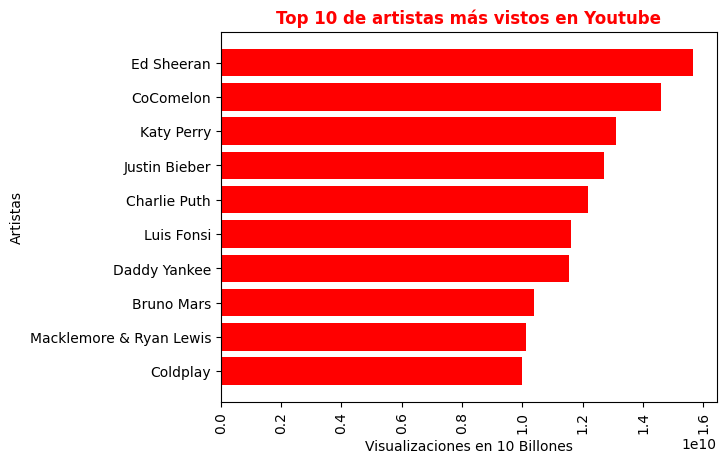

In [138]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los streams
artist_10 = Top_10_artist_yt.index
viewsartist_yt = Top_10_artist_yt['Visualizaciones_YT']
# Ordenar los datos en orden descendente
artist_10 = artist_10[::-1]
viewsartist_yt = viewsartist_yt[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Visualizaciones en 10 Billones')
ax.set_ylabel('Artistas')
ax.set_title('Top 10 de artistas más vistos en Youtube',color="red",fontweight='bold')
# Graficar los datos
ax.barh(artist_10, viewsartist_yt,color="red")
plt.xticks(rotation=90)
plt.show()

### TOP CANCIONES

#### ESCUCHAS

In [139]:
# Agrupamos las canciones y las ordenamos por escuchas totales
Top_10_cancion_escuchas = (Sp_Yt.groupby('Titulo_video')[['Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'En_vivo', 'Emocion', 'Tempo',
       'Duracion_min', 'Visualizaciones_YT', 'Likes_YT',
       'Comentarios_YT', 'Reproducciones_SP', 'Escuchas_Totales']].max()).sort_values(['Escuchas_Totales'], ascending=False).head(10)
Top_10_cancion_escuchas

,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Escuchas_Totales
Titulo_video,,,,,,,,,,,,,,
Luis Fonsi - Despacito ft. Daddy Yankee,0.655,0.797,-4.787,0.1530,0.19800,0.0670,0.839,177.928,3.82,8.079649e+09,50788652.0,4252791.0,1.506598e+09,9.586248e+09
Ed Sheeran - Shape of You (Official Music Video),0.825,0.652,-3.183,0.0802,0.58100,0.0931,0.931,95.977,3.90,6.043717e+09,31047780.0,1130327.0,3.362005e+09,9.405722e+09
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack,0.689,0.481,-7.503,0.0815,0.36900,0.0649,0.283,80.025,3.83,5.773798e+09,40147674.0,2127346.0,1.521255e+09,7.295053e+09
Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars,0.856,0.609,-7.223,0.0824,0.00801,0.0344,0.928,114.988,4.49,4.821016e+09,20067879.0,598916.0,1.653820e+09,6.474836e+09
Ed Sheeran - Thinking Out Loud (Official Music Video),0.781,0.445,-6.061,0.0295,0.47400,0.1840,0.591,78.998,4.69,3.547156e+09,14343730.0,362545.0,2.154334e+09,5.701490e+09
Ed Sheeran - Perfect (Official Music Video),0.599,0.448,-6.312,0.0232,0.16300,0.1060,0.168,95.050,4.39,3.361086e+09,19033010.0,486143.0,2.312690e+09,5.673776e+09
OneRepublic - Counting Stars (Official Music Video),0.664,0.705,-4.972,0.0382,0.06540,0.1150,0.477,122.017,4.30,3.721610e+09,16558621.0,475191.0,1.805320e+09,5.526930e+09
Justin Bieber - Sorry (PURPOSE : The Movement),0.654,0.760,-3.669,0.0450,0.07970,0.2990,0.410,99.945,3.35,3.627306e+09,15789307.0,865675.0,1.740759e+09,5.368065e+09
Maroon 5 - Sugar (Official Music Video),0.748,0.788,-7.055,0.0334,0.05910,0.0863,0.884,120.076,3.92,3.817733e+09,15340646.0,415496.0,1.502781e+09,5.320514e+09


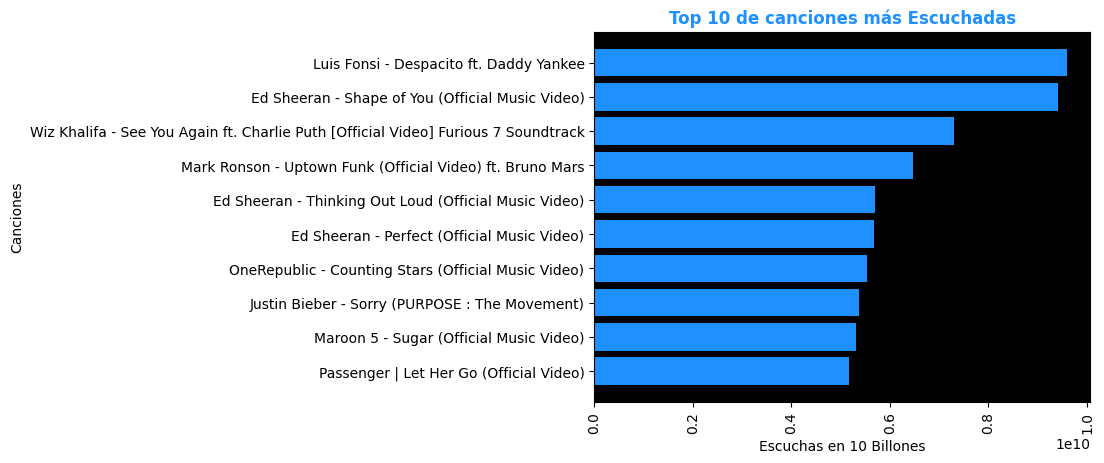

In [140]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los streams
songs_esc= Top_10_cancion_escuchas.index
streams_esc = Top_10_cancion_escuchas['Escuchas_Totales']
# Ordenar los datos en orden descendente
songs_esc = songs_esc[::-1]
streams_esc = streams_esc[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Escuchas en 10 Billones')
ax.set_ylabel('Canciones')
ax.set_title('Top 10 de canciones más Escuchadas',color="#1E90FF",fontweight='bold')
# Graficar los datos
ax.barh(songs_esc, streams_esc,color="#1E90FF")
ax.set_facecolor('black')
plt.xticks(rotation=90)

plt.show();

#### SPOTIFY

In [141]:
# Spotify 

# Agrupamos las canciones y las ordenamos por reproducciones de Spotify
Top_10_song_sp = (Sp_Yt.groupby('Titulo_video')[['Cancion-Artista','Reproducciones_SP']].max()).sort_values(['Reproducciones_SP'], ascending=False).head(10)
Top_10_song_sp

,Cancion-Artista,Reproducciones_SP
Titulo_video,,
The Weeknd - Blinding Lights (Official Video),Blinding Lights - The Weeknd,3.386520e+09
Ed Sheeran - Shape of You (Official Music Video),Shape of You - Ed Sheeran,3.362005e+09
Lewis Capaldi - Someone You Loved,Someone You Loved - Lewis Capaldi,2.634013e+09
Post Malone ft. 21 Savage - rockstar (Official Music Video),rockstar (feat. 21 Savage) - Post Malone,2.594927e+09
"Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse)",Sunflower - Spider-Man: Into the Spider-Verse ...,2.538330e+09
Drake - One Dance (Lyrics) ft. Wizkid & Kyla,One Dance - Drake,2.522432e+09
The Chainsmokers - Closer (Official Video) ft. Halsey,Closer - The Chainsmokers,2.456205e+09
Imagine Dragons - Believer (Official Music Video),Believer - Imagine Dragons,2.369272e+09
"The Kid LAROI, Justin Bieber - STAY (Official Video)",STAY (with Justin Bieber) - The Kid LAROI,2.365778e+09


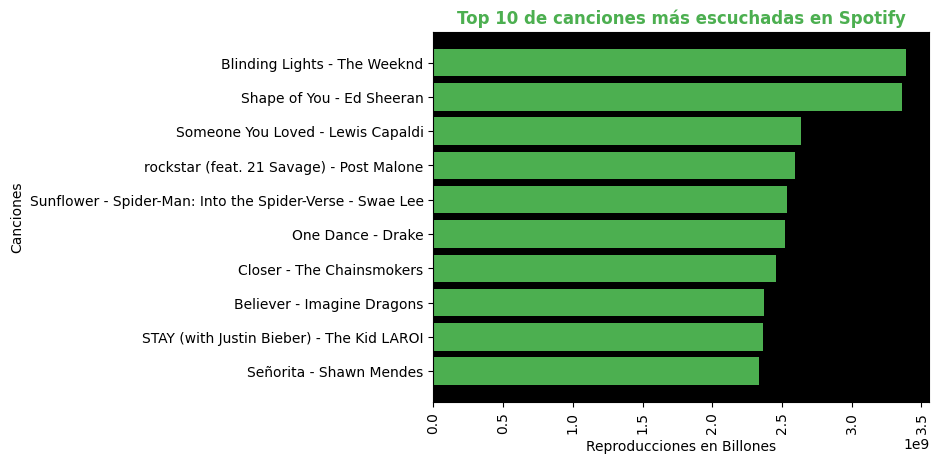

In [142]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los streams
songs_sp = Top_10_song_sp['Cancion-Artista']
streams_sp = Top_10_song_sp['Reproducciones_SP']
# Ordenar los datos en orden descendente
songs_sp = songs_sp[::-1]
streams_sp = streams_sp[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Reproducciones en Billones')
ax.set_ylabel('Canciones')
ax.set_title('Top 10 de canciones más escuchadas en Spotify',color="#4CAF50",fontweight='bold')
# Graficar los datos
ax.barh(songs_sp, streams_sp,color="#4CAF50")
ax.set_facecolor('black')
plt.xticks(rotation=90)

plt.show()

#### YOUTUBE

In [143]:
# Youtube
# Agrupamos por artistas y los ordnamos por Views
Top_10_song_yt = (Sp_Yt.groupby('Titulo_video')[['Visualizaciones_YT']].max()).sort_values(['Visualizaciones_YT'], ascending=False).head(10)
Top_10_song_yt

,Visualizaciones_YT
Titulo_video,
Luis Fonsi - Despacito ft. Daddy Yankee,8.079649e+09
Ed Sheeran - Shape of You (Official Music Video),6.043717e+09
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack,5.773798e+09
Wheels on the Bus | CoComelon Nursery Rhymes & Kids Songs,4.898831e+09
Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars,4.821016e+09
PSY - GANGNAM STYLE(강남스타일) M/V,4.679767e+09
Maroon 5 - Sugar (Official Music Video),3.817733e+09
Katy Perry - Roar (Official),3.725749e+09
OneRepublic - Counting Stars (Official Music Video),3.721610e+09


c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE 

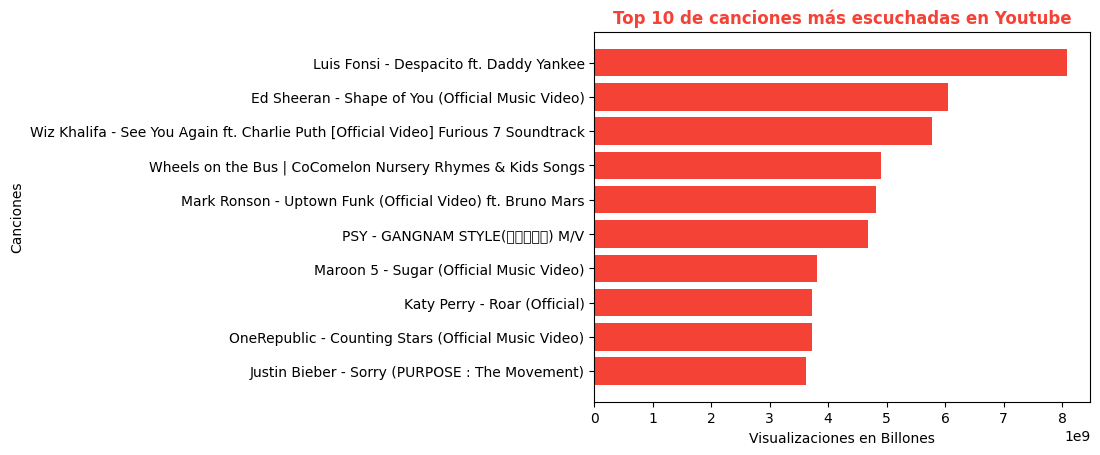

In [144]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y las views
song_yt = Top_10_song_yt.index
view_yt = Top_10_song_yt['Visualizaciones_YT']
# Ordenar los datos en orden descendente
song_yt = song_yt[::-1]
view_yt = view_yt[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Visualizaciones en Billones')
ax.set_ylabel('Canciones')
ax.set_title('Top 10 de canciones más escuchadas en Youtube',color="#F44336",fontweight='bold')
# Graficar los datos
ax.barh(song_yt, view_yt,color="#F44336")
ax.set_facecolor('white')
plt.show();

TOP LIKES

In [145]:
# Canciones más likeadas en Youtube
Top_10_like_yt = (Sp_Yt.groupby('Titulo_video')[['Likes_YT']].max()).sort_values(['Likes_YT'], ascending=False).head(10)
Top_10_like_yt

,Likes_YT
Titulo_video,
Luis Fonsi - Despacito ft. Daddy Yankee,50788652.0
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack,40147674.0
BTS (방탄소년단) 'Dynamite' Official MV,35892575.0
Ed Sheeran - Shape of You (Official Music Video),31047780.0
BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat. Halsey)' Official MV,27588224.0
Alan Walker - Faded,26446178.0
PSY - GANGNAM STYLE(강남스타일) M/V,26399133.0
"Billie Eilish, Khalid - lovely",24426202.0
BLACKPINK - 'How You Like That' M/V,24290306.0


c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE 

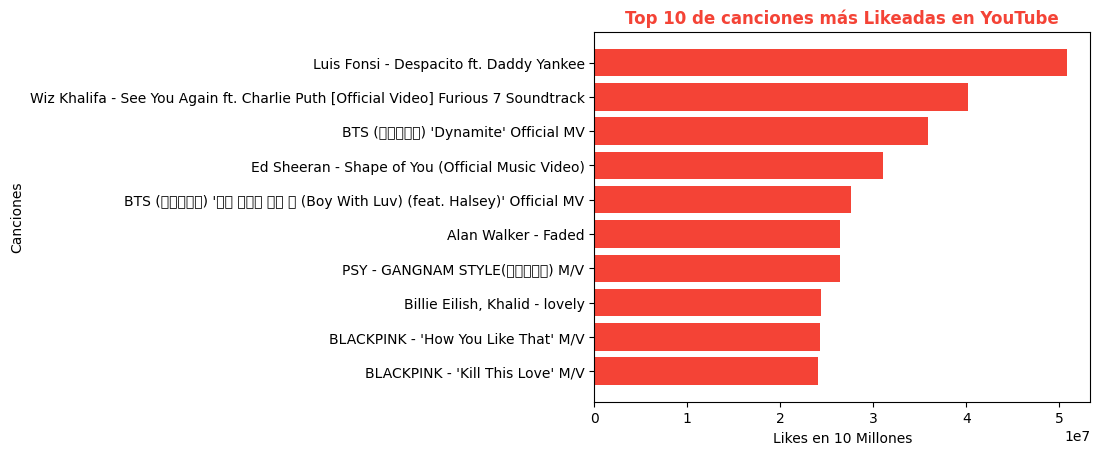

In [146]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los likes
song_like_yt = Top_10_like_yt.index
like_yt = Top_10_like_yt['Likes_YT']
# Ordenar los datos en orden descendente
song_like_yt =song_like_yt[::-1]
like_yt = like_yt[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Likes en 10 Millones')
ax.set_ylabel('Canciones')
ax.set_title('Top 10 de canciones más Likeadas en YouTube',color="#F44336",fontweight='bold')
# Graficar los datos
ax.barh(song_like_yt, like_yt,color="#F44336")
ax.set_facecolor('white')
plt.show();
# Aparecen por primera vez las estrellas de K-pop Los que nos dice que sus seguidores interactuan más
# La mitad del top 10 de likes son bandas de K-pop

TOP COMENTARIOS


In [147]:
# Canciones más Comentadas en Youtube

Top_10_comments_yt = (Sp_Yt.groupby('Titulo_video')[['Comentarios_YT']].max()).sort_values(['Comentarios_YT'], ascending=False).head(10)
Top_10_comments_yt

,Comentarios_YT
Titulo_video,
BTS (방탄소년단) 'Dynamite' Official MV,16083138.0
BTS (방탄소년단) 'Butter' Official MV,9131761.0
BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat. Halsey)' Official MV,6535721.0
PSY - GANGNAM STYLE(강남스타일) M/V,5331537.0
BLACKPINK - 'How You Like That' M/V,5130725.0
Justin Bieber - Baby ft. Ludacris,4805805.0
Luis Fonsi - Despacito ft. Daddy Yankee,4252791.0
BLACKPINK - ‘Pink Venom’ M/V,3637659.0
BTS (방탄소년단) 'Permission to Dance' Official MV,3486944.0


c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46748 (\N{HANGUL SYLLABLE DDU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sebas\miniconda3\envs\ramp_up_py395\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE 

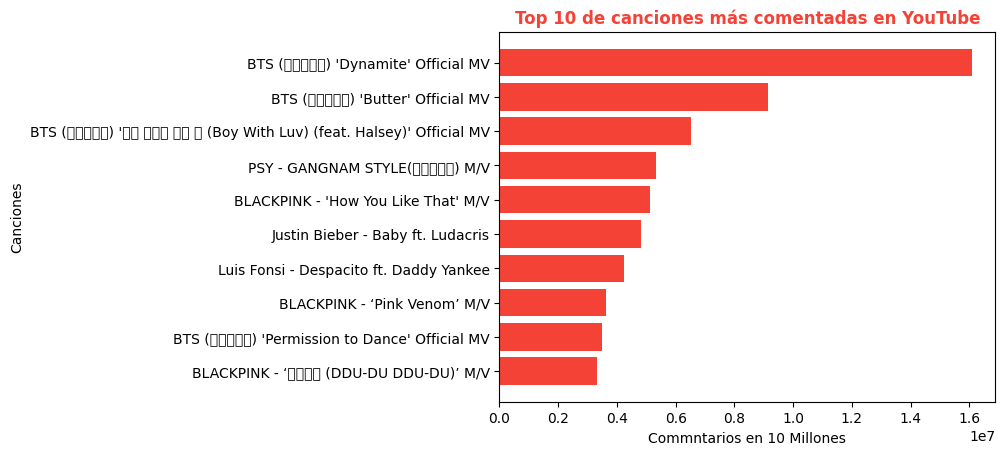

In [148]:
fig, ax = plt.subplots()
# Sacamos los nombres de las canciones y los likes
song_coments_yt = Top_10_comments_yt.index
coments_yt = Top_10_comments_yt['Comentarios_YT']
# Ordenar los datos en orden descendente
song_coments_yt =song_coments_yt[::-1]
coments_yt = coments_yt[::-1]
# Agregamos titulo del gráfico y nombramos los ejes
ax.set_xlabel('Commntarios en 10 Millones')
ax.set_ylabel('Canciones')
ax.set_title('Top 10 de canciones más comentadas en YouTube',color="#F44336",fontweight='bold')
# Graficar los datos
ax.barh(song_coments_yt, coments_yt,color="#F44336")
ax.set_facecolor('white')
plt.show();
# Aparecen por primera vez las estrellas de K-pop Los que nos dice que sus seguidores interactuan más
# En los comentarios se destaca aún más la interaccion del publico asiatico

## Correlación

In [152]:
# Solo incluimos columnas numéricas
numeric_columns = Sp_Yt.select_dtypes(include=[np.number])
sp_yt_corr = abs(numeric_columns.corr("spearman"))


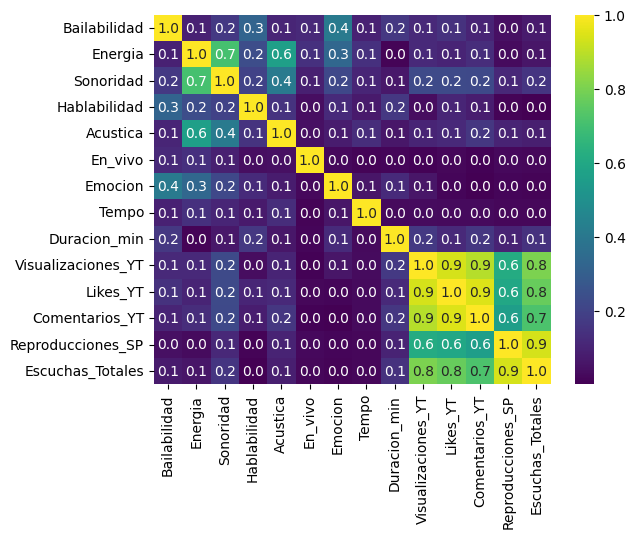

In [153]:
# Hacemos un grafico de correlación con todas las variables numéricas del Df
sns.heatmap(sp_yt_corr, annot=True,cmap="viridis", fmt="0.1f");

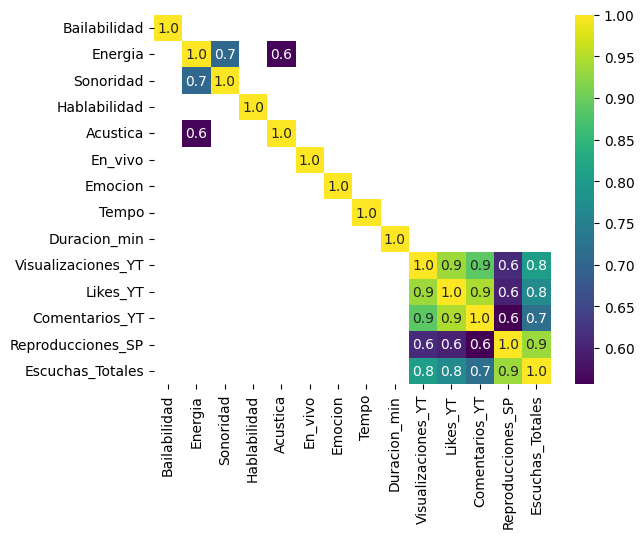

In [155]:
# Establecemos un umbral de relevancia de la correlación
umbral = 0.5
# Filtramos las correlaciones significativas
corr_sign = sp_yt_corr[(sp_yt_corr > umbral) | (sp_yt_corr< -umbral)]
# Vemos la correlación que hay entre las variables agrupads por artista
sns.heatmap(corr_sign, annot=True,cmap="viridis", fmt="0.1f");

Comprobamos que no hay mucha realción entre las características numéricas de las canciones

Hay una correlacion significativa entre la Sonoridad y la Energia de una canción <br>
Graficamos la relación con un Scatter Plot para ver como se comportan

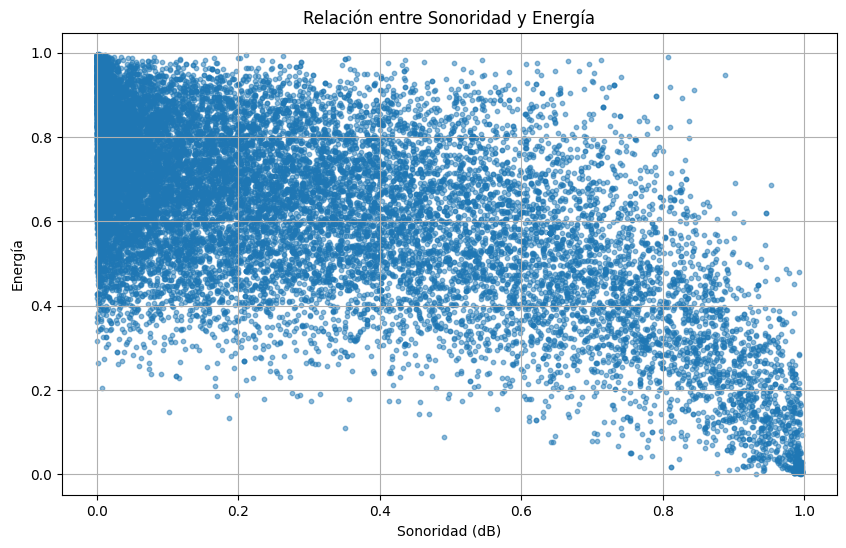

In [156]:
# Graficar scatter plot de Sonoridad vs. Energía
plt.figure(figsize=(10, 6))
plt.scatter(Sp_Yt['Acustica'], Sp_Yt['Energia'], s=10, alpha=0.5)
plt.xlabel('Sonoridad (dB)')
plt.ylabel('Energía')
plt.title('Relación entre Sonoridad y Energía')
plt.grid(True)
plt.show()

Podemos ver que cuanto más ruidosa es una canción tiene más energía <br>
Los puntos se agrupan y siguen una dirección, se puede ver la correlación. 


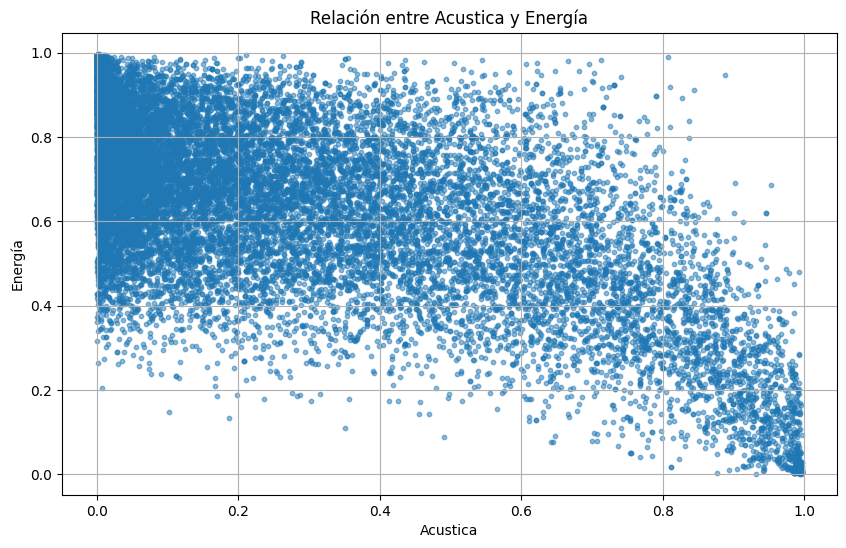

In [157]:
# Graficar scatter plot de Sonoridad vs. Energía
plt.figure(figsize=(10, 6))
plt.scatter(Sp_Yt['Acustica'], Sp_Yt['Energia'], s=10, alpha=0.5)
plt.xlabel('Acustica')
plt.ylabel('Energía')
plt.title('Relación entre Acustica y Energía')
plt.grid(True)
plt.show()

In [160]:
Sp_Yt.head()

,Artista,Cancion,Album,Tipo_album,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Titulo_video,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Cancion-Artista,Escuchas_Totales
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.6130,0.772,138.559,3.71,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,1.040235e+09,Feel Good Inc. - Gorillaz,1.733790e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.0463,0.852,92.761,3.34,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,3.100837e+08,Rhinestone Eyes - Gorillaz,3.820954e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.1160,0.551,108.014,3.59,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,6.306347e+07,New Gold (feat. Tame Impala and Bootie Brown) ...,7.149852e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.0640,0.578,120.423,3.90,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,4.346636e+08,On Melancholy Hill - Gorillaz,6.464185e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.0698,0.525,167.953,5.68,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,6.172597e+08,Clint Eastwood - Gorillaz,1.235741e+09


In [167]:
# Seleccionar solo las columnas numéricas
numeric_columns = Sp_Yt.select_dtypes(include=[np.number]).columns

# Convertir solo las columnas numéricas a numerico
Sp_Yt[numeric_columns] = Sp_Yt[numeric_columns].apply(pd.to_numeric, errors='coerce')

Sp_Yt["Artista"] = Sp_Yt["Artista"].astype(str)

# Creamos un DF con la media de las variables numéricas por artista
artista_mean = Sp_Yt.groupby("Artista")[numeric_columns].mean()
artista_mean["Escuchas_Totales"] = Sp_Yt.groupby("Artista")["Escuchas_Totales"].sum()
artista_mean = artista_mean.sort_values("Escuchas_Totales", ascending=False)


In [168]:
# Queremos ver como se relaciónan las variables por artista
artistcorr = abs(artista_mean.corr('spearman'))
artistcorr

,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Escuchas_Totales
Bailabilidad,1.000000,0.167720,0.272899,0.586604,0.198945,0.042863,0.457843,0.052002,0.218519,0.213726,0.254387,0.192698,0.067821,0.146464
Energia,0.167720,1.000000,0.753058,0.236594,0.689703,0.297998,0.327982,0.259506,0.019755,0.186525,0.160156,0.188195,0.090121,0.142093
Sonoridad,0.272899,0.753058,1.000000,0.315240,0.530322,0.187715,0.216052,0.244441,0.134756,0.369791,0.357106,0.343302,0.218883,0.309582
Hablabilidad,0.586604,0.236594,0.315240,1.000000,0.247048,0.118314,0.121962,0.040139,0.236635,0.114985,0.219477,0.190597,0.021974,0.062715
Acustica,0.198945,0.689703,0.530322,0.247048,1.000000,0.195310,0.068994,0.219320,0.032304,0.180511,0.205321,0.258337,0.242241,0.226526
En_vivo,0.042863,0.297998,0.187715,0.118314,0.195310,1.000000,0.095133,0.096213,0.002411,0.014149,0.008303,0.016708,0.005350,0.015212
Emocion,0.457843,0.327982,0.216052,0.121962,0.068994,0.095133,1.000000,0.081496,0.065713,0.077643,0.005000,0.027465,0.058920,0.008842
Tempo,0.052002,0.259506,0.244441,0.040139,0.219320,0.096213,0.081496,1.000000,0.096632,0.060565,0.043318,0.044827,0.072540,0.074861
Duracion_min,0.218519,0.019755,0.134756,0.236635,0.032304,0.002411,0.065713,0.096632,1.000000,0.121571,0.044618,0.114268,0.055733,0.002355
Visualizaciones_YT,0.213726,0.186525,0.369791,0.114985,0.180511,0.014149,0.077643,0.060565,0.121571,1.000000,0.922378,0.873838,0.603249,0.835296


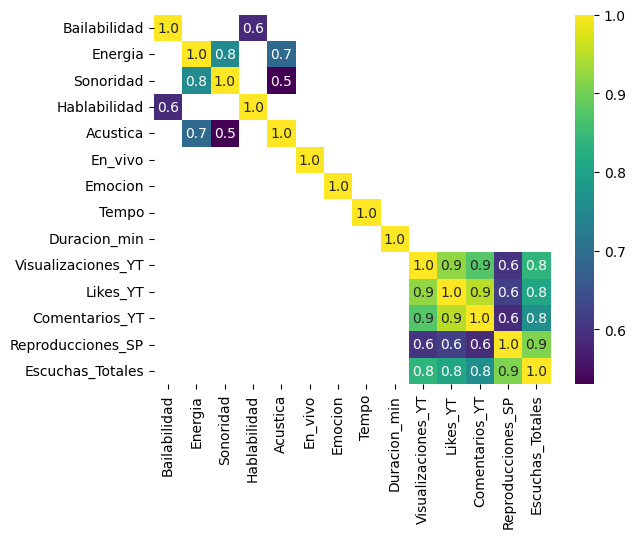

In [169]:
# Establecemos un umbral de relevancia de la correlación
umbral = 0.5
# Filtramos las correlaciones significativas
correlaciones_significativas_artistas = artistcorr[(artistcorr > umbral) | (artistcorr < -umbral)]
# Vemos la correlación que hay entre las variables agrupads por artista
sns.heatmap(correlaciones_significativas_artistas, annot=True,cmap="viridis", fmt="0.1f");

In [171]:
# Creamos una matriz de correlación entre los 10 artistas más escuchados 
# La correlación de Spearman evalúa la relación entre variables, no asume linealidad ni normalidad y es útil para variables ordinales o datos no paramétricos.
# Seleccionar solo las columnas numéricas
numeric_columns = Top_10_artist_escuchas.select_dtypes(include=[np.number]).columns

corr_Top_10_artist_esc= abs(Top_10_artist_escuchas[numeric_columns].corr(method='spearman'))
corr_Top_10_artist_esc

,Bailabilidad,Energia,Sonoridad,Hablabilidad,Acustica,En_vivo,Emocion,Tempo,Duracion_min,Visualizaciones_YT,Likes_YT,Comentarios_YT,Reproducciones_SP,Escuchas_Totales
Bailabilidad,1.000000,0.551515,0.660606,0.006061,0.393939,0.321212,0.903030,0.915152,0.127273,0.127273,0.175758,0.442424,0.006061,0.175758
Energia,0.551515,1.000000,0.903030,0.078788,0.866667,0.248485,0.624242,0.212121,0.090909,0.272727,0.539394,0.527273,0.333333,0.842424
Sonoridad,0.660606,0.903030,1.000000,0.078788,0.709091,0.236364,0.660606,0.406061,0.212121,0.078788,0.296970,0.393939,0.284848,0.648485
Hablabilidad,0.006061,0.078788,0.078788,1.000000,0.175758,0.151515,0.018182,0.103030,0.745455,0.321212,0.236364,0.006061,0.539394,0.200000
Acustica,0.393939,0.866667,0.709091,0.175758,1.000000,0.260606,0.539394,0.103030,0.103030,0.187879,0.430303,0.393939,0.515152,0.818182
En_vivo,0.321212,0.248485,0.236364,0.151515,0.260606,1.000000,0.030303,0.418182,0.115152,0.333333,0.272727,0.466667,0.587879,0.406061
Emocion,0.903030,0.624242,0.660606,0.018182,0.539394,0.030303,1.000000,0.793939,0.224242,0.272727,0.127273,0.248485,0.284848,0.321212
Tempo,0.915152,0.212121,0.406061,0.103030,0.103030,0.418182,0.793939,1.000000,0.090909,0.393939,0.103030,0.151515,0.090909,0.151515
Duracion_min,0.127273,0.090909,0.212121,0.745455,0.103030,0.115152,0.224242,0.090909,1.000000,0.127273,0.212121,0.090909,0.175758,0.115152
Visualizaciones_YT,0.127273,0.272727,0.078788,0.321212,0.187879,0.333333,0.272727,0.393939,0.127273,1.000000,0.636364,0.745455,0.393939,0.272727


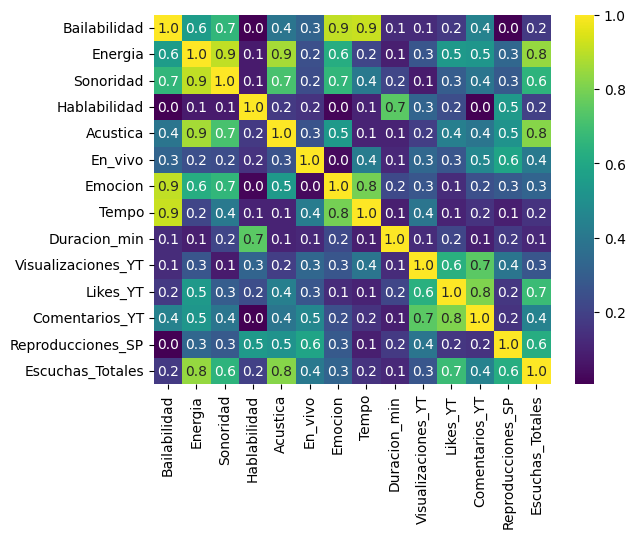

In [172]:
# Como se relacionan las variables de los 10 artistas más escuchados
sns.heatmap(corr_Top_10_artist_esc, annot=True,cmap="viridis", fmt="0.1f");

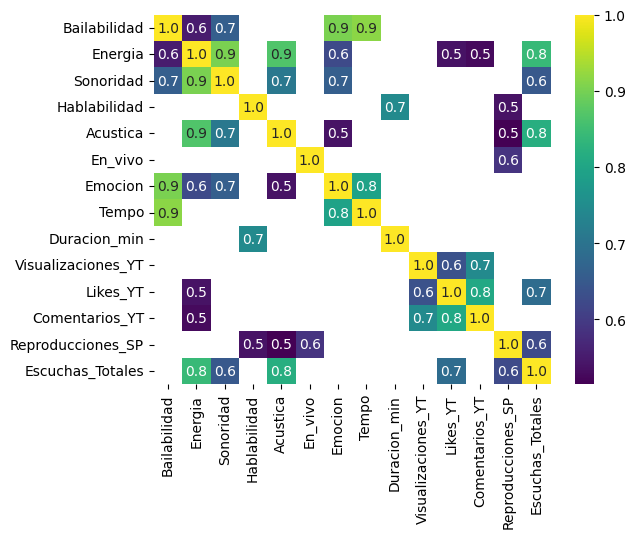

In [173]:
# Establecemos un umbral de relevancia de la correlación
umbral = 0.5
# Filtramos las correlaciones significativas para que sea más facil de ver
correlaciones_significativas_artistas_10 = abs(corr_Top_10_artist_esc[(corr_Top_10_artist_esc > umbral) | (corr_Top_10_artist_esc < -umbral)])
# Vemos la correlación que hay entre las variables agrupads por artista
sns.heatmap(correlaciones_significativas_artistas_10, annot=True,cmap="viridis", fmt="0.1f");

## TEST DE HIPOTESIS

Antes de comenzar con los Test de Hipótesis separamos la muestra de la población para lograr una independencia en los datos.<br>

In [174]:
# Creamos una copia del df de la poblacion 
Sp_Yt_Pob = Sp_Yt.copy()
# Crear una columna "Eliminar" en Sp_Yt_Pob para identificar las filas que deben eliminarse
Sp_Yt_Pob['Eliminar'] = Sp_Yt_Pob['Titulo_video'].isin(Top_10_cancion_escuchas.index)

# Filtramos las filas que deben mantenerse en Sp_Yt_Pob
Sp_Yt_Pob = Sp_Yt_Pob[~Sp_Yt_Pob['Eliminar']]

# Eliminamos la columna "Eliminar".
Sp_Yt_Pob = Sp_Yt_Pob.drop('Eliminar', axis=1)

Sacamos las medias poblacionales y muestrales de todas las variables numericas por canción

In [175]:
# Sacamos la media muestral.
media_muestral = Top_10_cancion_escuchas.mean()
media_muestral

Bailabilidad          7.018000e-01
Energia               6.230000e-01
Sonoridad            -5.811100e+00
Hablabilidad          6.352000e-02
Acustica              2.945210e-01
En_vivo               1.157700e-01
Emocion               5.761000e-01
Tempo                 1.127530e+02
Duracion_min          4.113000e+00
Visualizaciones_YT    4.616916e+09
Likes_YT              2.384790e+07
Comentarios_YT        1.116651e+06
Reproducciones_SP     1.934493e+09
Escuchas_Totales      6.551409e+09
dtype: float64

Realizaremos una comparativa de medias de las distintas variables para una primera comparación de los datos

In [176]:
# Agrupamos la población por titulo de video y agregamos .max() para evitar repetidos
Poblacion = Sp_Yt_Pob.groupby('Titulo_video')[['Bailabilidad', 'Energia',
       'Sonoridad', 'Hablabilidad', 'Acustica', 'En_vivo', 'Emocion', 'Tempo',
       'Duracion_min', 'Visualizaciones_YT', 'Likes_YT',
       'Comentarios_YT', 'Reproducciones_SP','Escuchas_Totales']].max()
# Poblacion[Poblacion.index== "QUEVEDO || BZRP Music Sessions #52"] #-> Prueba de que no está repetido


In [177]:
# La Poblacion es todo el df
# Sacamos la media poblacional
media_poblacional = Poblacion.mean()

In [178]:
# Creamos un diccionario con las medias poblacionales y muestralles
dict = {'medias_poblacion': media_poblacional,
        'medias_muestra': media_muestral}

In [179]:
# Creamos un df con las medias
medias_relacion = pd.DataFrame(dict)
# Creamos la columna con la diferencia la diferencia entre los valores de las dos series
medias_relacion['Diferencia_medias'] = medias_relacion['medias_poblacion'] - medias_relacion['medias_muestra']
medias_relacion

,medias_poblacion,medias_muestra,Diferencia_medias
Bailabilidad,6.237782e-01,7.018000e-01,-7.802175e-02
Energia,6.439705e-01,6.230000e-01,2.097047e-02
Sonoridad,-7.366128e+00,-5.811100e+00,-1.555028e+00
Hablabilidad,9.186492e-02,6.352000e-02,2.834492e-02
Acustica,2.807975e-01,2.945210e-01,-1.372351e-02
En_vivo,1.943329e-01,1.157700e-01,7.856286e-02
Emocion,5.372116e-01,5.761000e-01,-3.888842e-02
Tempo,1.215825e+02,1.127530e+02,8.829494e+00
Duracion_min,3.685954e+00,4.113000e+00,-4.270463e-01
Visualizaciones_YT,8.626254e+07,4.616916e+09,-4.530653e+09


In [180]:
# Guardamos el df en un nuevo CSV 
# Sp_Yt.to_csv("EDA_Clean", index=False)

## Hipótesis: Las canciones más populares son las más bailables, alegres y enérgicas

Para contestar esta pregunta, analizaremos las medias de las variables bailabilidad, emoción y energía de la población y de una muestra de las 10 canciones más escuchadas.

Para el analisis, realizaremos un test de Hipótesis para saber si las medias poblacionales son iguales a las medias muestrales

Como hemos demostrado anteriormente, la Bailabilidad, la Emoción y la Energía no siguen una distribución normal, por lo que debemos realizar un test para variables no paramétricas<br>
Realizaremos la prueba de **Mann-Withney** para obtener el valor p que luego compararemos con el nivel de significancia alpha(5% en este caso)<br>

### BAILABILIDAD

La Hipótesis nula dice que las canciones de la población, son en media, igual de bailables que las de la muestra del top 10<br>
La Hipótesis Alternativa establece que son distintas 

$$H_0: \mu = X$$
$$H_1: \mu \neq X$$


In [181]:
# Realizamos la Prueba de MannWithney
test = mannwhitneyu(Sp_Yt_Pob.Bailabilidad,Top_10_cancion_escuchas.Bailabilidad)
# Obtenemos el valor p de la prueba
p_value = test.pvalue
# Definimos el nivel de significancia
alpha = 0.05  
print(test)
if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la hipóitesis nula.")
else:
    print("Rechazamos la Hipotesis Nula. Las medias son distintas.")

MannwhitneyuResult(statistic=70807.0, pvalue=0.1325904213177127)
No hay suficiente evidencia para rechazar la hipóitesis nula.


Al no rechazar la Hipótesis Nula no podemos afirmar diferencias significativaas entre ambas medias

Aunque el Test nos dice que las medias no tienen una diferencia significatica, igualmente realizaremos un nuevo test para ver cuál es menor.<br>

La Hipotesis Nula establece que las canciones de la población, son en media, igual o más bailables que las de la muestra del top 10<br>
La Hipótesis Alternativa establece que las canciones de la población, son en media, menos bailables que las de la muestra del top 10

$$H_0: \mu \geq \ X$$
$$H_1: \mu < \ X$$

Nuevamente utilizaremos el test de Mann-Whitney  con un nivel de significancia del 5%

In [182]:
# Realizamos el test de Mann-Whitney
test = mannwhitneyu(Sp_Yt_Pob["Bailabilidad"], Top_10_cancion_escuchas["Bailabilidad"], alternative='less')
# Obtenemos el valor p de la prueba
p_value = test.pvalue
# Definimos el nivel de significancia
alpha = 0.05

if p_value < alpha:
    print(f"Rechazamos la hipótesis nula. La media de la Bailabilidad de la población es significativamente menor que las 10 canciones más escuchadas. \nP_valor = {p_value} < {0.05}")
else: 
    print(f"No podemos rechazar la hipótesis nula. \nNo hay suficiente evidencia para afirmar que las canciones de la población, son en media, menos bailables que las de la muestra del top 10. \nP_valor = {p_value} > {0.05}")

No podemos rechazar la hipótesis nula. 
No hay suficiente evidencia para afirmar que las canciones de la población, son en media, menos bailables que las de la muestra del top 10. 
P_valor = 0.06629521065885635 > 0.05


Realizaremos un gráfico de cajas para comprobarlo

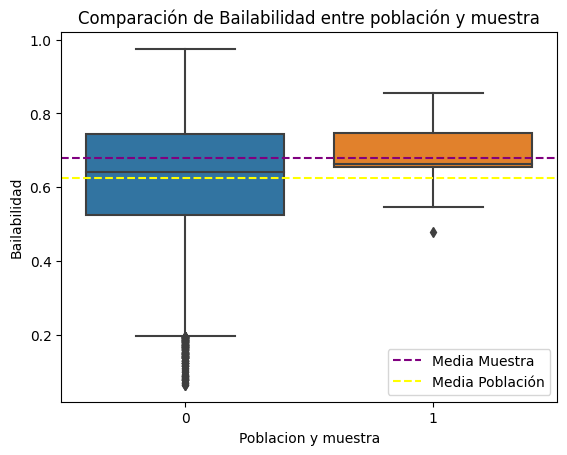

In [183]:
# Creamos una copia del df de la poblacion para el test
Sp_Yt_test = Sp_Yt.copy()
# Creamos una columna Top 10 para que los valores que son parte del top 10 se vean como True y los que no como False
# Lo pasamos a valor integral para poder graficarlo. 1 True 0 False
Sp_Yt_test['top_10'] = Sp_Yt_test['Titulo_video'].isin(Top_10_cancion_escuchas.index).astype(int)

# Calculamos las medias de la población y de la muestra
media_poblacion = Sp_Yt_test[Sp_Yt_test['top_10'] == 0]['Bailabilidad'].mean()
media_muestra = Sp_Yt_test[Sp_Yt_test['top_10'] == 1]['Bailabilidad'].mean()

# Creamos un gráfico de caja para comparar ambas cajas
sns.boxplot(x="top_10", y="Bailabilidad", data=Sp_Yt_test)
plt.xlabel('Poblacion y muestra')
plt.ylabel('Bailabilidad')
plt.title('Comparación de Bailabilidad entre población y muestra')
# Le agregamos lineas para que se vean las medias
plt.axhline(y=media_muestra, color='purple', linestyle='--', label='Media Muestra')
plt.axhline(y=media_poblacion, color='Yellow', linestyle='--', label='Media Población')
plt.legend(loc='lower right')
plt.show()

De esta manera podemos ver como se nota una diferencia entre las medias de Bailabilidad. <br>La media de la bailabilidad de la muestra es superior a la media de la Población

**Conclusión:** Las canciones del Top 10 son, en media, más bailables que las que no están en el Top 10.<br>
No tienen una diferencia significativa, pero suelen ser más bailables

### EMOCIÓN

La Hipótesis nula dice que las canciones de la población, son en media, igual de alegres que las de la muestra del top 10<br>
La Hipótesis Alternativa establece que son distintas 

$$H_0: \mu = X$$
$$H_1: \mu \neq X$$

In [184]:
# Realizamos la Prueba de MannWithney
test = mannwhitneyu(Sp_Yt_Pob.Emocion,Top_10_cancion_escuchas.Emocion)
# Obtenemos el valor p de la prueba
p_value = test.pvalue
# Definimos el nivel de significancia
alpha = 0.05

if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la hipóitesis nula.")
else:
    print("Rechazamos la Hipotesis Nula. Las medias son distintas.")

No hay suficiente evidencia para rechazar la hipóitesis nula.


Al no rechazar la Hipótesis Nula no podemos afirmar diferencias significativaas entre ambas medias<br>
Aunque el Test nos dice que las medias no tienen una diferencia significatica, igualmente realizaremos un nuevo test para ver cuál es menor.<br>

La Hipotesis Nula establece que las canciones de la población, son en media, igual o más alegres que las de la muestra del top 10<br>
La Hipótesis Alternativa establece que las canciones de la población, son en media, menos alegres que las de la muestra del top 10

$$H_0: \mu \geq \ X$$
$$H_1: \mu < \ X$$

Nuevamente utilizaremos el test de Mann-Whitney  con un nivel de significancia del 5%

In [185]:
# Realizamos el test de Mann-Whitney
test = mannwhitneyu(Sp_Yt_Pob["Emocion"], Top_10_cancion_escuchas["Emocion"], alternative='less')
# Obtenemos el valor p de la prueba
p_value = test.pvalue
# Definimos el nivel de significancia
alpha = 0.05

if p_value < alpha:
    print(f"Rechazamos la hipótesis nula. La media de la Emoción de la población es significativamente menor que las 10 canciones más escuchadas. \nP_valor = {p_value} < {0.05}")
else: 
    print(f"No podemos rechazar la hipótesis nula. \nNo hay suficiente evidencia para afirmar que que las canciones de la población, son en media, menos alegres que las de la muestra del top 10. \nP_valor = {p_value} > {0.05}")

No podemos rechazar la hipótesis nula. 
No hay suficiente evidencia para afirmar que que las canciones de la población, son en media, menos alegres que las de la muestra del top 10. 
P_valor = 0.3292634929554542 > 0.05


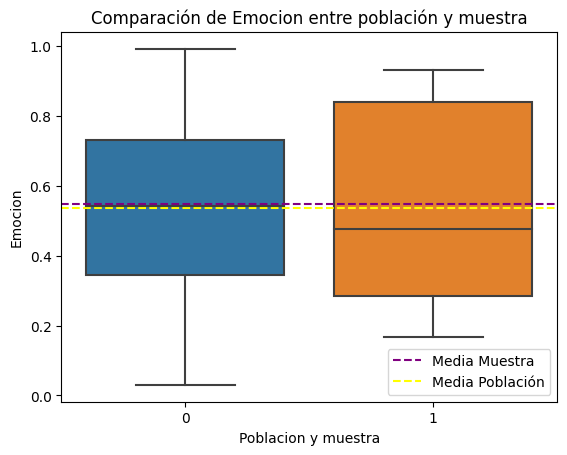

In [186]:
media_poblacion = Sp_Yt_test[Sp_Yt_test['top_10'] == 0]['Emocion'].mean()
media_muestra = Sp_Yt_test[Sp_Yt_test['top_10'] == 1]['Emocion'].mean()

# Creamos un gráfico de caja para comparar ambas cajas
sns.boxplot(x="top_10", y="Emocion", data=Sp_Yt_test)
plt.xlabel('Poblacion y muestra')
plt.ylabel('Emocion')
plt.title('Comparación de Emocion entre población y muestra')
# Le agregamos lineas para que se vean las medias
plt.axhline(y=media_muestra, color='purple', linestyle='--', label='Media Muestra')
plt.axhline(y=media_poblacion, color='Yellow', linestyle='--', label='Media Población')
plt.legend(loc='lower right')
plt.show()

De esta manera podemos ver como se nota una pequeña diferencia entre las medias de Emocion. <br> 
**Conclusión:** Las canciones del Top 10 no son necesariamente más alegres que las que no están en el Top 10

### ENERGIA

La Hipótesis nula dice que las canciones de la población, son en media, igual de enérgicas que las de la muestra del top 10<br>
La Hipótesis Alternativa establece que son distintas 

$$H_0: \mu = X$$
$$H_1: \mu \neq X$$

In [187]:
# Realizamos la Prueba de MannWithney
test = mannwhitneyu(Sp_Yt_Pob.Energia,Top_10_cancion_escuchas.Energia)
# Obtenemos el valor p de la prueba
p_value = test.pvalue
# Definimos el nivel de significancia
alpha = 0.05

if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la Hipóitesis Nula.")
else:
    print("Rechazamos la Hipotesis Nula. Las medias son distintas.")

No hay suficiente evidencia para rechazar la Hipóitesis Nula.


Al no rechazar la Hipótesis Nula no podemos afirmar diferencias significativaas entre ambas medias<br>
Aunque el Test nos dice que las medias no tienen una diferencia significatica, igualmente realizaremos un nuevo test para ver cuál es menor.<br>

La Hipotesis Nula establece que las canciones de la población, son en media, igual o más enérgicas que las de la muestra del top 10<br>
La Hipótesis Alternativa establece que las canciones de la población, son en media, menos enérgicass que las de la muestra del top 10

$$H_0: \mu \geq \ X$$
$$H_1: \mu < \ X$$

Nuevamente utilizaremos el test de Mann-Whitney  con un nivel de significancia del 5%

In [188]:
# Realizamos el test de Mann-Whitney
test = mannwhitneyu(Sp_Yt_Pob["Energia"], Top_10_cancion_escuchas["Energia"], alternative='less')
# Obtenemos el valor p de la prueba
p_value = test.pvalue
# Definimos el nivel de significancia
alpha = 0.05

if p_value < alpha:
    print(f"Rechazamos la Hipótesis Nula. La media de la Emoción de la población es significativamente menor que las 10 canciones más escuchadas. \nP_valor = {p_value} < {0.05}")
else: 
    print(f"No podemos rechazar la Hipótesis Nula. \nNo hay suficiente evidencia para afirmar que que las canciones de la población, son en media, menos enérgicas que las de la muestra del top 10. \nP_valor = {p_value} > {0.05}")

No podemos rechazar la Hipótesis Nula. 
No hay suficiente evidencia para afirmar que que las canciones de la población, son en media, menos enérgicas que las de la muestra del top 10. 
P_valor = 0.7509841730415299 > 0.05


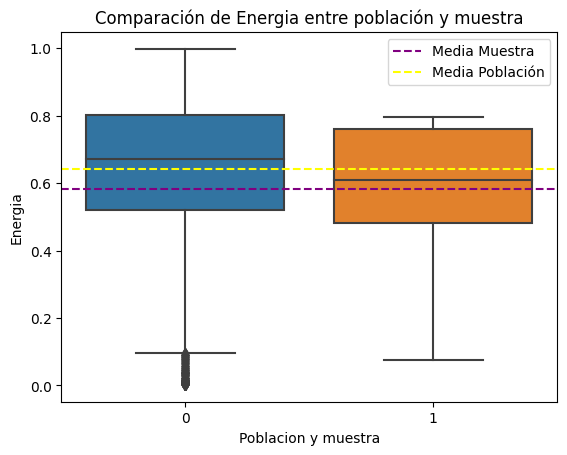

In [189]:
media_poblacion = Sp_Yt_test[Sp_Yt_test['top_10'] == 0]['Energia'].mean()
media_muestra = Sp_Yt_test[Sp_Yt_test['top_10'] == 1]['Energia'].mean()

# Creamos un gráfico de caja para comparar ambas cajas
sns.boxplot(x="top_10", y="Energia", data=Sp_Yt_test)
plt.xlabel('Poblacion y muestra')
plt.ylabel('Energia')
plt.title('Comparación de Energia entre población y muestra')
# Le agregamos lineas para que se vean las medias
plt.axhline(y=media_muestra, color='purple', linestyle='--', label='Media Muestra')
plt.axhline(y=media_poblacion, color='Yellow', linestyle='--', label='Media Población')
plt.legend(loc='upper right')
plt.show()

Con el gráfico, podemos ver una diferencia entre las medias de Energía. <br>
La media de la Energía de la Población es superior a la media de la muestra

**Conclusión:** Las canciones del Top 10 son, en media, menos enérgicas que las que no están en el Top 10.<br>
No tienen una diferencia significativa, pero suelen ser menos enérgicas

## Hipotesis: Las caniones más escuchadas no pueden tener una duración muy larga

Para contestar esta pregunta, analizaremos las variables duración_minutos y Total_Escuchas<br>
Para el analisis, primero categorizaremos la duración de las cancniones en 3 grupos

* grupo1 de 1 a 3 min
* grupo2 más de 3 a 6 min
* grupo3 más 6 a 10 min

Para el analisis, realizaremos un test de Hipótesis para saber si las medias de los grupos son iguales

Como hemos demostrado anteriormente, la variable Total_Escichas no sigue una distribución normal, por lo que debemos realizar un test para variables no paramétricas<br>
Realizaremos la prueba de  **Krustall Wallisy** que sirve para comparar la media de 3 o mas grupos de una misma población. <br> 

En caso de que las medias no sean iguales, optaremos por hacer un test **Mann-Withne** para ver que grupo es más escuchado<br>



In [190]:
# Para agrupar las las canciones debemos crear una nueva columna donde se clasifiquen según el grupo

# Definimos los límites de los intervalos y las etiquetas de las categorías
limites = [0, 3, 6, 10]  
categorias = [1,2,3] 

# Categorizamos la columna "Duracion_min" utilizando pd.cut en una nueva columna Categoria_Duración
Sp_Yt['Categoria_Duracion'] = pd.cut(Sp_Yt['Duracion_min'], bins=limites, labels=categorias)

In [191]:
# Creamos grupos segun la duración de la canción
grupo1=Sp_Yt[Sp_Yt.Categoria_Duracion==1]
grupo2=Sp_Yt[Sp_Yt.Categoria_Duracion==2]
grupo3=Sp_Yt[Sp_Yt.Categoria_Duracion==3]

H0: Las medias de los 3 grupos son iguales<br>
H1: Las medias de los 3 grupos son distintas

In [192]:
# Realizamos el test de Krustal-Wallis
estadistico,p_value = kruskal(grupo1.Escuchas_Totales,grupo2.Escuchas_Totales,grupo3.Escuchas_Totales)
# Definimos el nivel de significancia
alpha = 0.05
if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la hipóitesis nula.")
else:
    print("Rechazamos la Hipotesis Nula. Hay diferencias significativas entre los grupos.")
print(p_value)

Rechazamos la Hipotesis Nula. Hay diferencias significativas entre los grupos.
1.7380793728894112e-122


In [193]:
# Realizamos el test de MannWithney entre los distintos grupos para evaluar cada grupo entre sí

for i in range(1,3):
    for j in range(i+1,4):
        _,p=mannwhitneyu(Sp_Yt[Sp_Yt["Categoria_Duracion"]==i].Escuchas_Totales,Sp_Yt[Sp_Yt["Categoria_Duracion"]==j].Escuchas_Totales)
        if p < 0.05:
            print("los grupos {0} y {1} son diferentes".format(i,j))
            print("Realizamos una prueba con el alternativo less")
            _,p=mannwhitneyu(Sp_Yt[Sp_Yt["Categoria_Duracion"]==i].Escuchas_Totales,Sp_Yt[Sp_Yt["Categoria_Duracion"]==j].Escuchas_Totales,alternative="less")
            if p<0.05:
                print("El grupo {0} es superior a {1}".format(i,j))
            else:
                print("El grupo {0} es inferior a {1}".format(i,j))

los grupos 1 y 2 son diferentes
Realizamos una prueba con el alternativo less
El grupo 1 es superior a 2
los grupos 1 y 3 son diferentes
Realizamos una prueba con el alternativo less
El grupo 1 es superior a 3
los grupos 2 y 3 son diferentes
Realizamos una prueba con el alternativo less
El grupo 2 es inferior a 3


**Conclución** Las canciones con la duración entre 1 y 3 min son las más escuchadas.

Observación: Sin embargo, las canciones con más de 6 minutos tienen más escuchas que las que tienen entre 3 y 6 minutos.

Lo graficamos para ver las diferencias

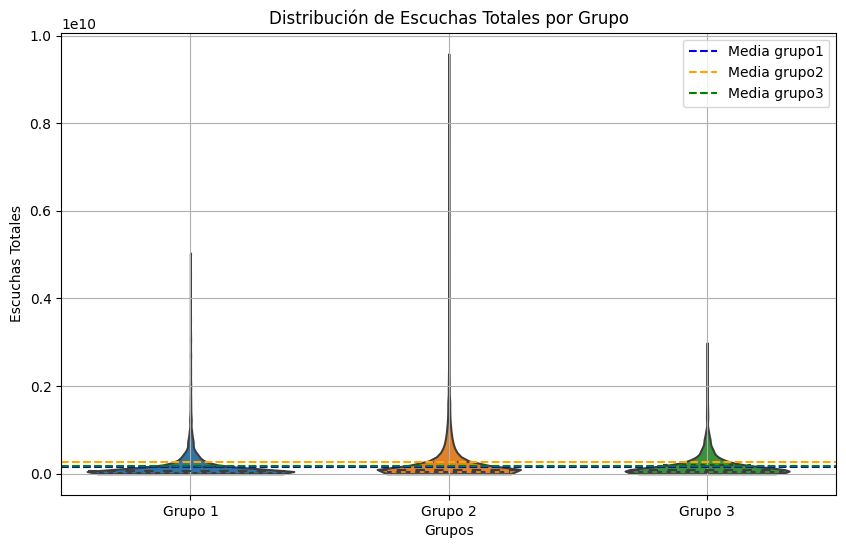

In [194]:
# # Crear un DataFrame con los datos de los grupos
data = pd.DataFrame({'Grupo 1': grupo1.Escuchas_Totales, 'Grupo 2': grupo2.Escuchas_Totales, 'Grupo 3': grupo3.Escuchas_Totales})

media_grupo1 = grupo1.Escuchas_Totales.mean()
media_grupo2 = grupo2.Escuchas_Totales.mean()
media_grupo3 = grupo3.Escuchas_Totales.mean()

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, inner='quartile', cut=0)
plt.title("Distribución de Escuchas Totales por Grupo")
plt.xlabel("Grupos")
plt.ylabel("Escuchas Totales")
plt.grid(True)

plt.axhline(y=media_grupo1, color='blue', linestyle='--', label='Media grupo1')
plt.axhline(y=media_grupo2, color='orange', linestyle='--', label='Media grupo2')
plt.axhline(y=media_grupo3, color='green', linestyle='--', label='Media grupo3')

plt.legend(loc='upper right')
plt.show()

plt.show()

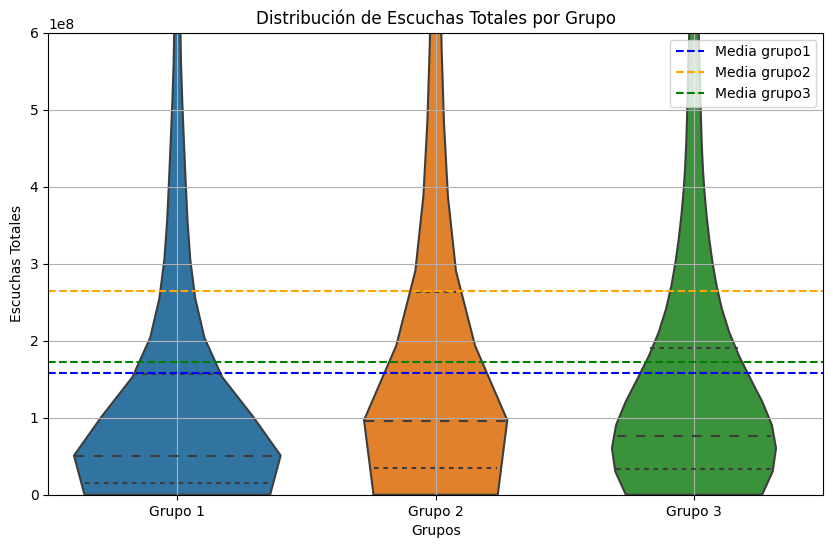

In [195]:
# Hacemos zoom en las medias
# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, inner='quartile', cut=0)
plt.title("Distribución de Escuchas Totales por Grupo")
plt.xlabel("Grupos")
plt.ylabel("Escuchas Totales")
plt.grid(True)

plt.axhline(y=media_grupo1, color='blue', linestyle='--', label='Media grupo1')
plt.axhline(y=media_grupo2, color='orange', linestyle='--', label='Media grupo2')
plt.axhline(y=media_grupo3, color='green', linestyle='--', label='Media grupo3')

#  Definir el rango del eje y (eje vertical) para que las líneas de las medias se vean mejor
plt.gca().set_ylim(bottom=0, top=600000000)


plt.legend(loc='upper right')
plt.show()

plt.show()